<a href="https://colab.research.google.com/github/niteshavagabond/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

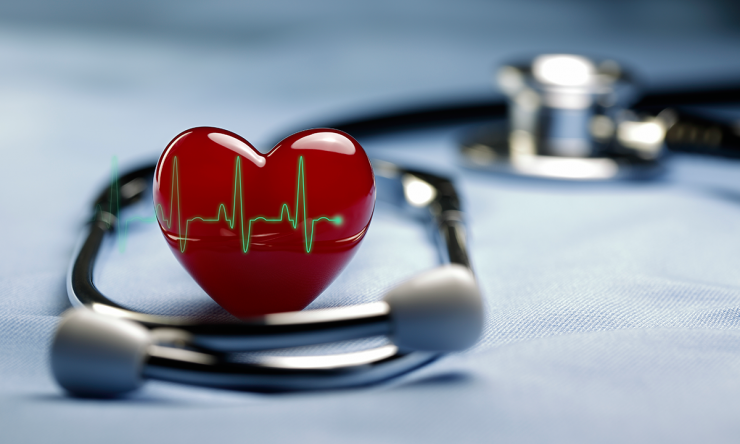

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral:
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

Target variable:
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - Target variable

In [151]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [152]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone_Projects/8_Cardiovascular_Risk_Prediction/data-cardiovascular_risk.csv')

In [154]:
# top 5 index values
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [155]:
# last 5 index values
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [156]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [157]:
# shape of dataset
df.shape

(3390, 17)

In [158]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Data Preprocessing & Feature engineering

## 1. Droping irrelevant features

In [159]:
# droping irrelevant columns from dataset
df.drop(['id'], axis=1, inplace=True) # id and education status of patients are not going to help to predict cardiovascular risk

*Since id has no effect on target variable so will drop this coloumn from our dataset

## 2. Handling null values

In [160]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
1,education,float64,87,2.57,4,"[2.0, 4.0, 1.0, 3.0, nan]"
2,sex,object,0,0.00,2,"[F, M]"
3,is_smoking,object,0,0.00,2,"[YES, NO]"
4,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
5,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
6,prevalentStroke,int64,0,0.00,2,"[0, 1]"
7,prevalentHyp,int64,0,0.00,2,"[0, 1]"
8,diabetes,int64,0,0.00,2,"[0, 1]"
9,totChol,float64,38,1.12,240,"[221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238..."


In [161]:
# total null values present in columns
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* In the Dataset we have total of 3390 rows and 17 columns.

We havee missing values in:
* education
*   cigsperday
*   BPMeds
*   totChol
*   BMI
*   Heart Rate
*   glucose


In [162]:
#Sanity check
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
dtype: float64

* Except glucose all other features in the dataset have less than 5% null values.
* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

In [163]:
# dropping the missing value.
df = df.dropna(how = "any")

In [164]:
# Checking if there's still any null values left.
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* Now, no null values present in dataset

## 3. Checking duplicate values

In [165]:
# Checking for the duplicate values
len(df[df.duplicated()])

0

* there are no duplicate values in our dataset.

## 4. Dealing with outliers

In [166]:
# Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 9 numerical variables
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


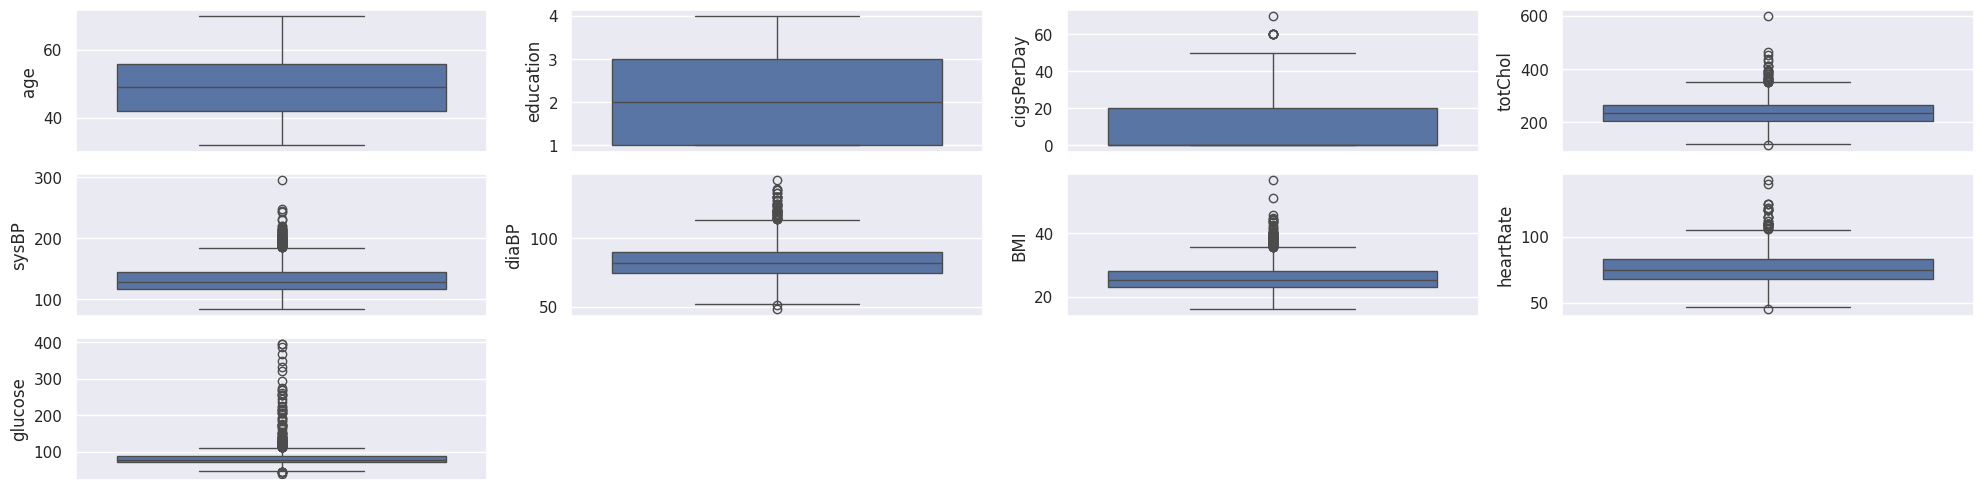

In [167]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1

plt.tight_layout()

In [168]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

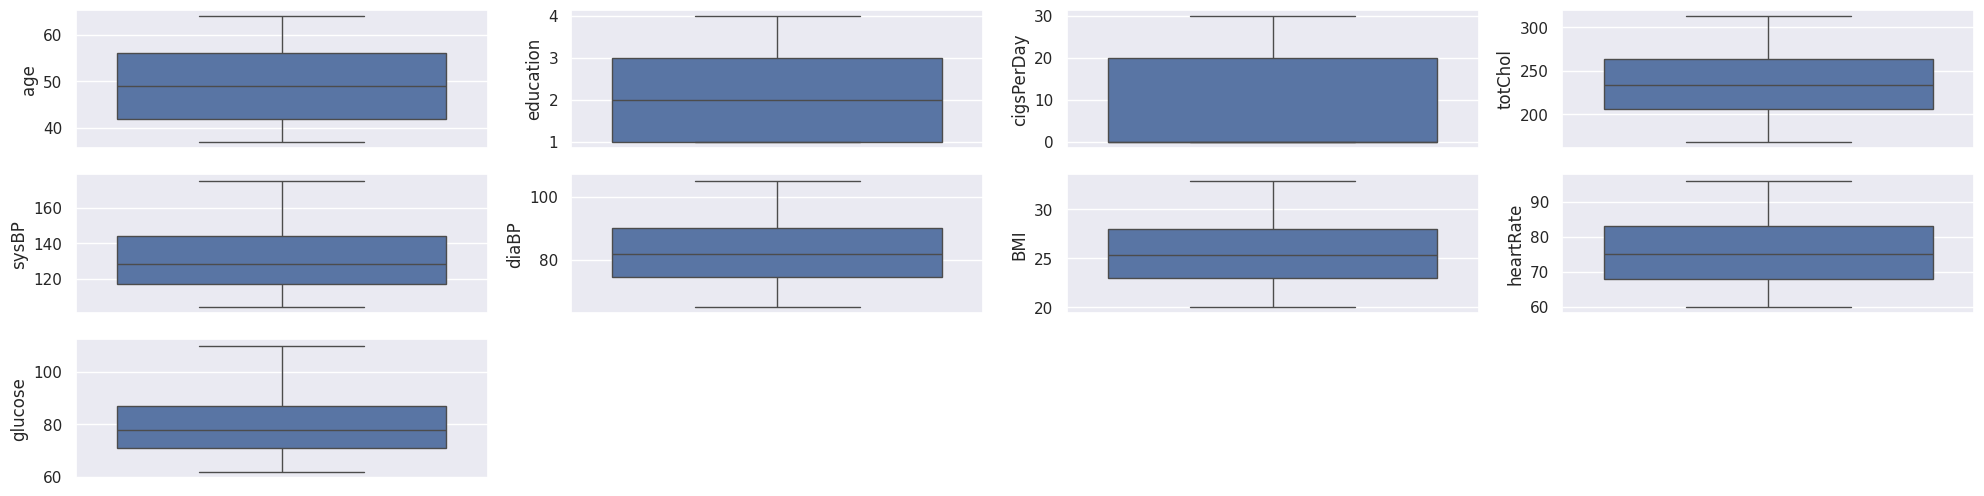

In [169]:
##finding result
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1

plt.tight_layout()

* Now, there is no outliers present in our dataset.

## 5. Combining columns

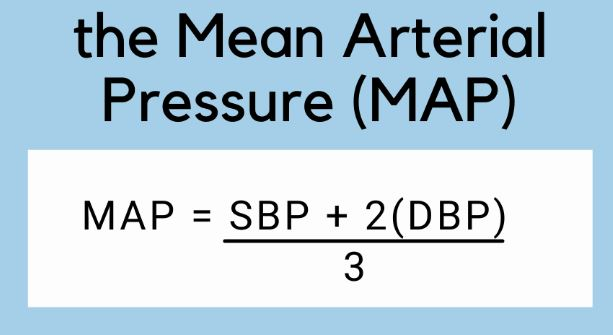

In [170]:
# Combining systolic and diastolic blood pressure column through formula
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [171]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
1,37,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.167
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,128.450


## 6. Categorical encoding

In [172]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df['sex'].replace({'M':0,'F':1},inplace=True)

## 7. Renaming Target Variable

In [173]:
# renaming target variable
df = df.rename(columns={'TenYearCHD':'Heart_Disease'})

# Exploratory Data Analysis (EDA)

##Correlation and Heatmap

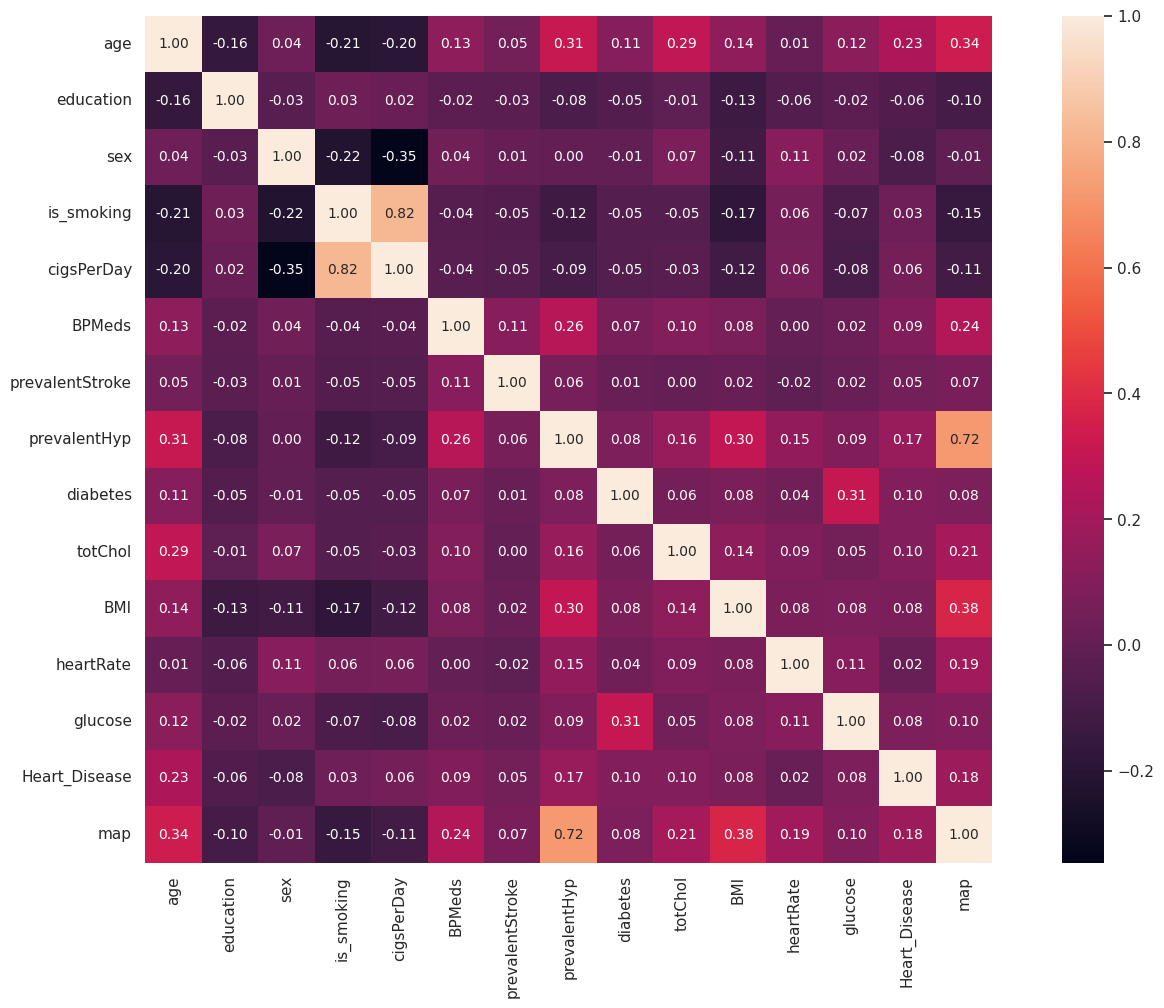

In [174]:
# ploting heat map finding correlation between columns
cdf = df.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);

* As per the correlation matrix, cigsperday and is_smoking are highly correlated (0.82), also map and prevalentHyp are highly correlated (0.72).
* so we are dropping is_smoking column and prevalentHyp


In [175]:
# droping is_smoking and prevalentHyp columns
df.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

##Univariate analysis

### 1. Heart disease (target variable) distribution

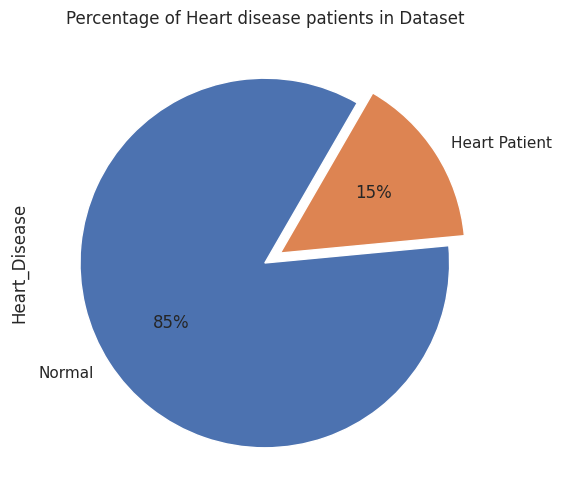

In [176]:
# Plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))
ax1 = df['Heart_Disease'].value_counts().plot.pie( x="Heart_Disease" ,y ='no.of patients',
autopct = "%1.0f%%",labels=["Normal","Heart Patient"], startangle = 60,ax=ax1,explode = (0,0.1))
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

* According to the pie chart, dataset contains 85% normal persons and 15% heart patients.
* The class of the dataset is highly imbalanced, we will use SMOTE technique to handle class imbalance.

###Handling Data Imbalance using SMOTE

What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other one has a very low number of observations.

Methods to handle imbalanced dataset

* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We'll use SMOTE Technique here to balance our dataset

Highly imbalance data will be dealt further at the time of model building

###2. Genderwise distribution

In [177]:
# creating separate df for normal and heart patients

patient =df[df['Heart_Disease']==1]

normal =df[df['Heart_Disease']==0]

Text(0.5, 1.0, 'Distribution of Gender')

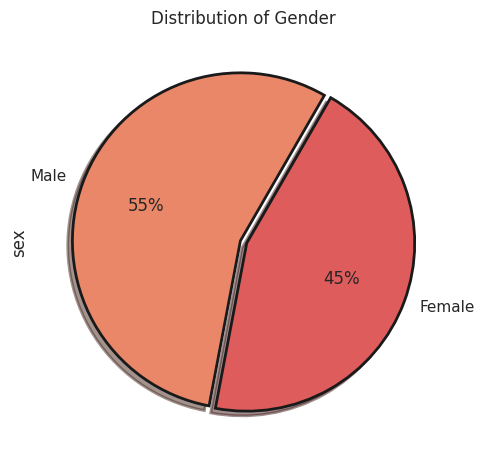

In [178]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.02,.02],shadow =True)
plt.title("Distribution of Gender")

* According to the pie chart, given dataset contains 55% male and 45% female.

<ipython-input-179-615904d29360>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Male', 'Female'])
<ipython-input-179-615904d29360>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Male', 'Female'])


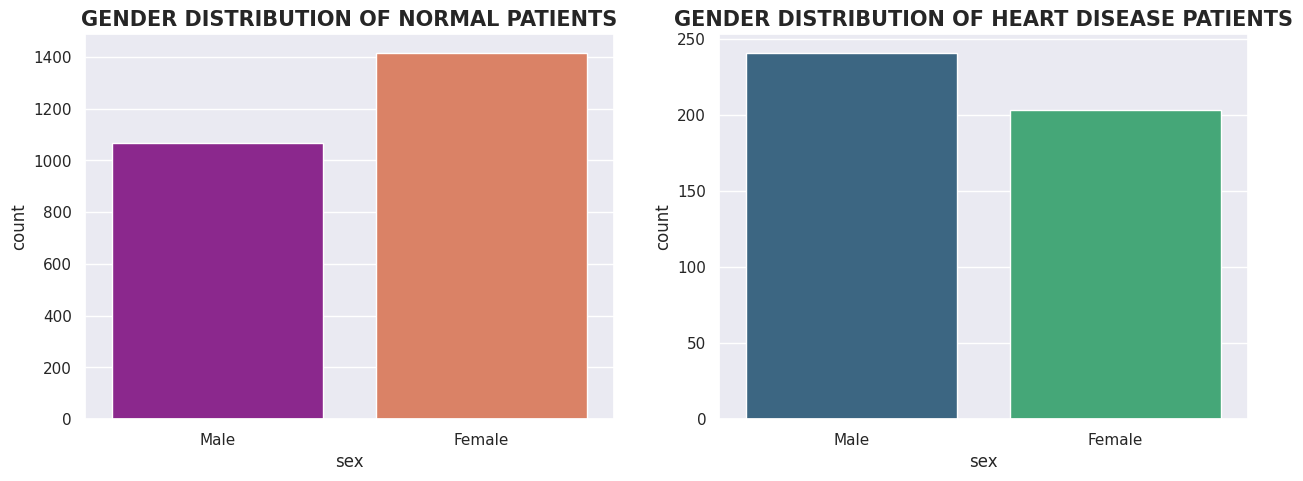

In [179]:
fig = plt.figure(figsize=(15, 5))

# Plotting normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x='sex', data=normal, palette='plasma', ax=ax1)
ax1.set_xticklabels(['Male', 'Female'])
ax1.set_title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart disease patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=patient, palette='viridis', ax=ax2)
ax2.set_xticklabels(['Male', 'Female'])
ax2.set_title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

plt.show()

* According to bar chart, males are more prone to heart disease as compared to females.

###3. Age Distribution

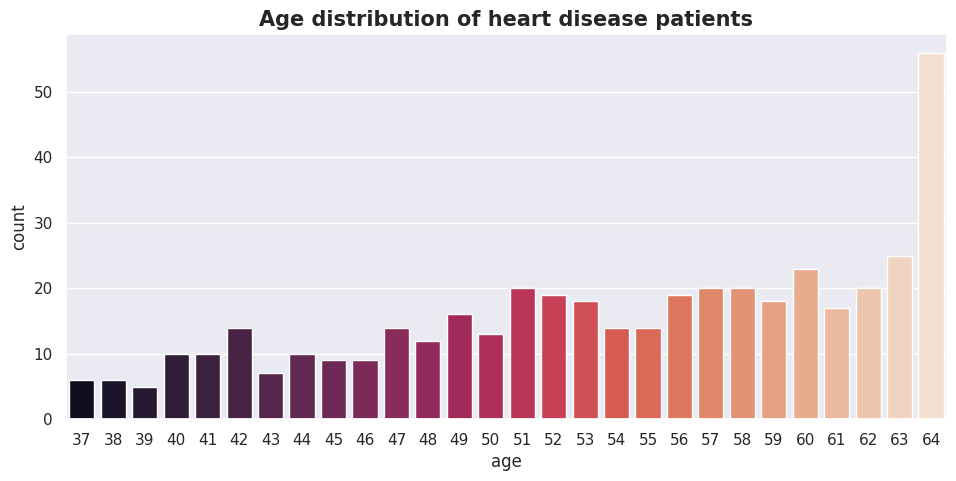

In [180]:
fig = plt.figure(figsize=(25, 5))

# Plotting heart disease patients
# Specify the subplot position with subplot2grid and assign it to an axes object (ax1)
ax1 = plt.subplot2grid((1, 2), (0, 1))

# Use the axes object (ax1) as the argument for seaborn countplot
sns.countplot(x='age', data=patient, palette='rocket', ax=ax1)

# Set the title for the subplot
ax1.set_title('Age distribution of heart disease patients', fontsize=15, weight='bold')

# Display the plot
plt.show()

* According to the chart, as age increases, the chances of suffering from heart problems are more likely.

###4.Education Distribution

<Axes: xlabel='education', ylabel='count'>

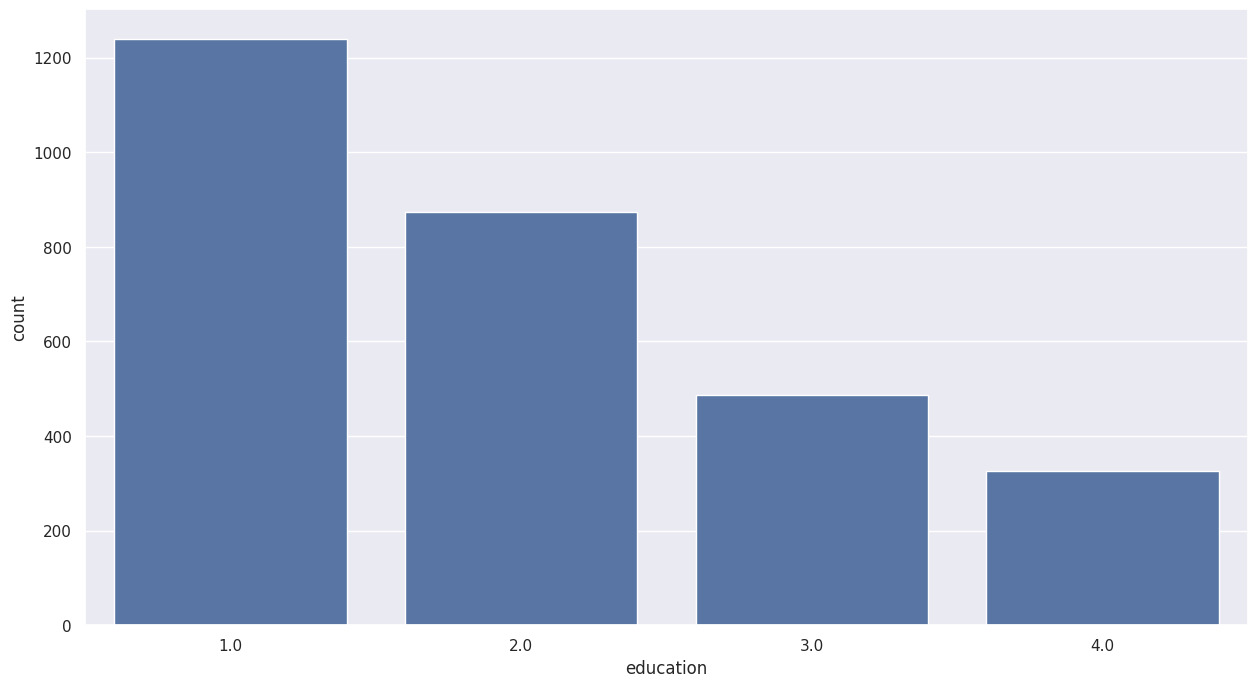

In [181]:
sns.countplot(x='education', data=df)

* According to plot, highest and least education categories are 1 and 4 respectively.

###5. Body Mass Index (BMI) Distribution

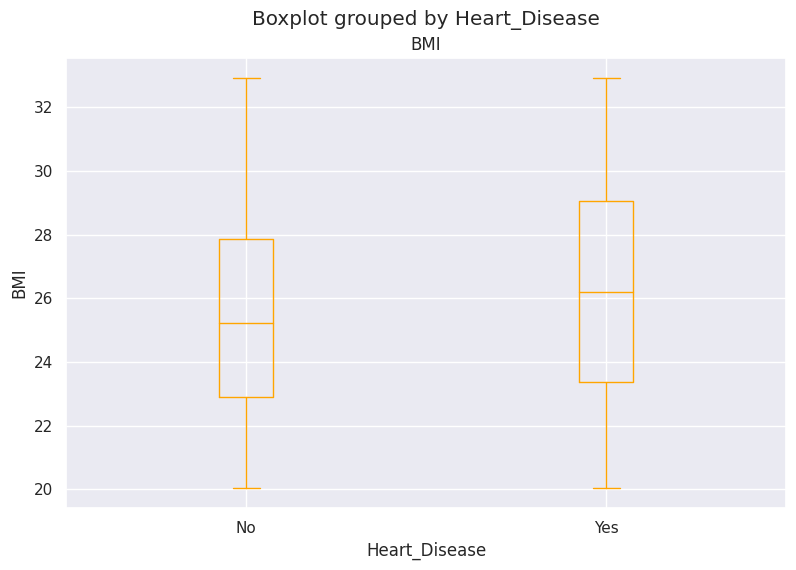

In [182]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'BMI', by = 'Heart_Disease', ax = ax, color='orange')
ax.set_ylabel("BMI")
ax.set(xticklabels = (['No','Yes']))
plt.show()

* According to the boxplot, Higher BMI leads to higher chances of Heart Disease

###6. Cholestrol Distribution

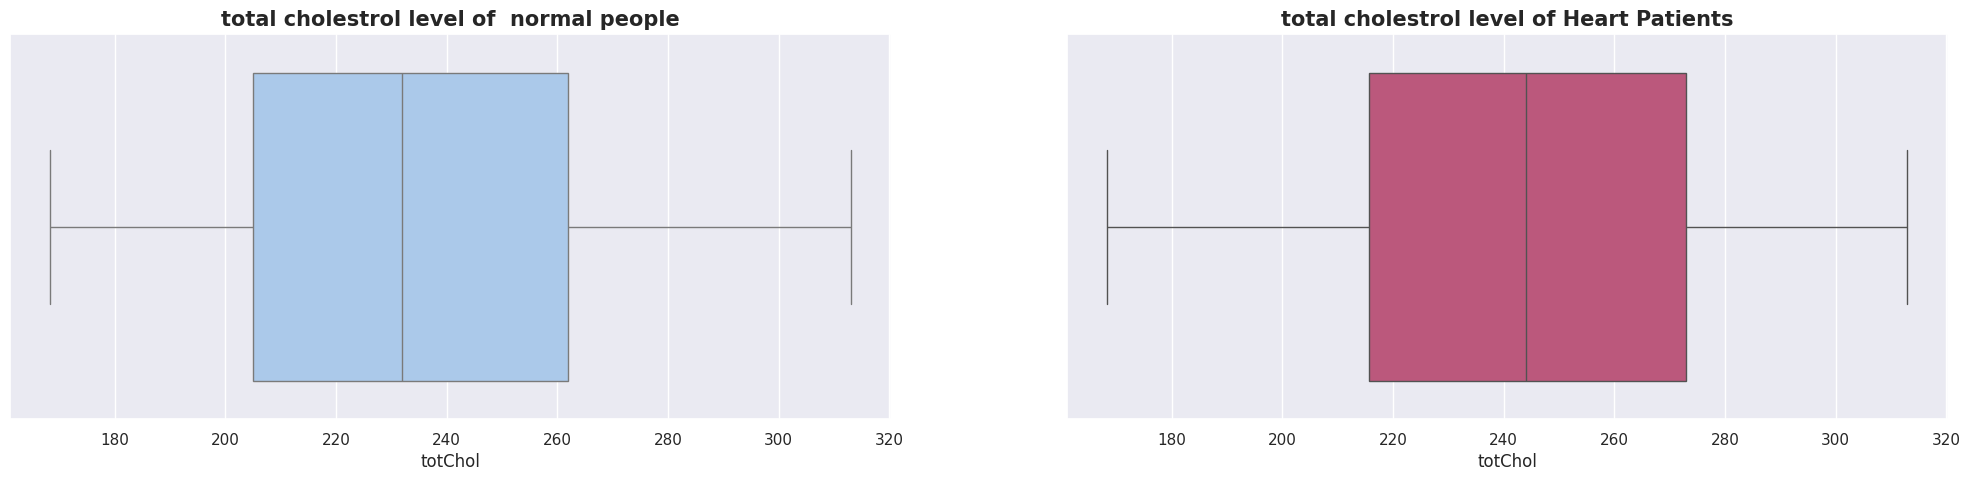

In [183]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='pastel')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

* Total Cholesterol level of heart patient seems to be slightly higher than normal patient.
* People who have cholesterol level more than 240 are prone to heart problems.

###7. Mean Arterial Pressure (map) Distribution

<ipython-input-184-29bb6ea89e43>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,2),(0,1))
<ipython-input-184-29bb6ea89e43>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set(xticklabels = (['No','Yes']))


Text(0.5, 1.0, 'Map of heart disease patients')

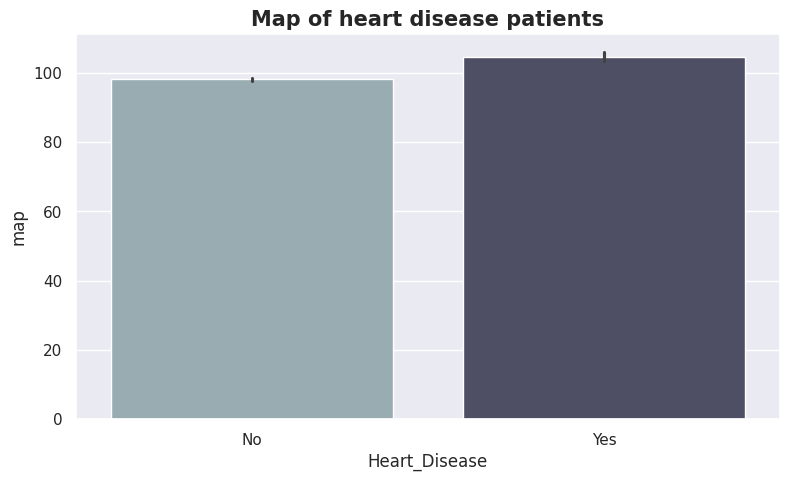

In [184]:
#plotting heart patients
fig,ax1=plt.subplots(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(x=df['Heart_Disease'],y=df['map'],palette='bone_r')
ax1.set(xticklabels = (['No','Yes']))
plt.title('Map of heart disease patients', fontsize=15, weight='bold' )

* In the above graph, the heart disease patients have higher MAP.
* If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension.

###8.Mean and Median Visualization

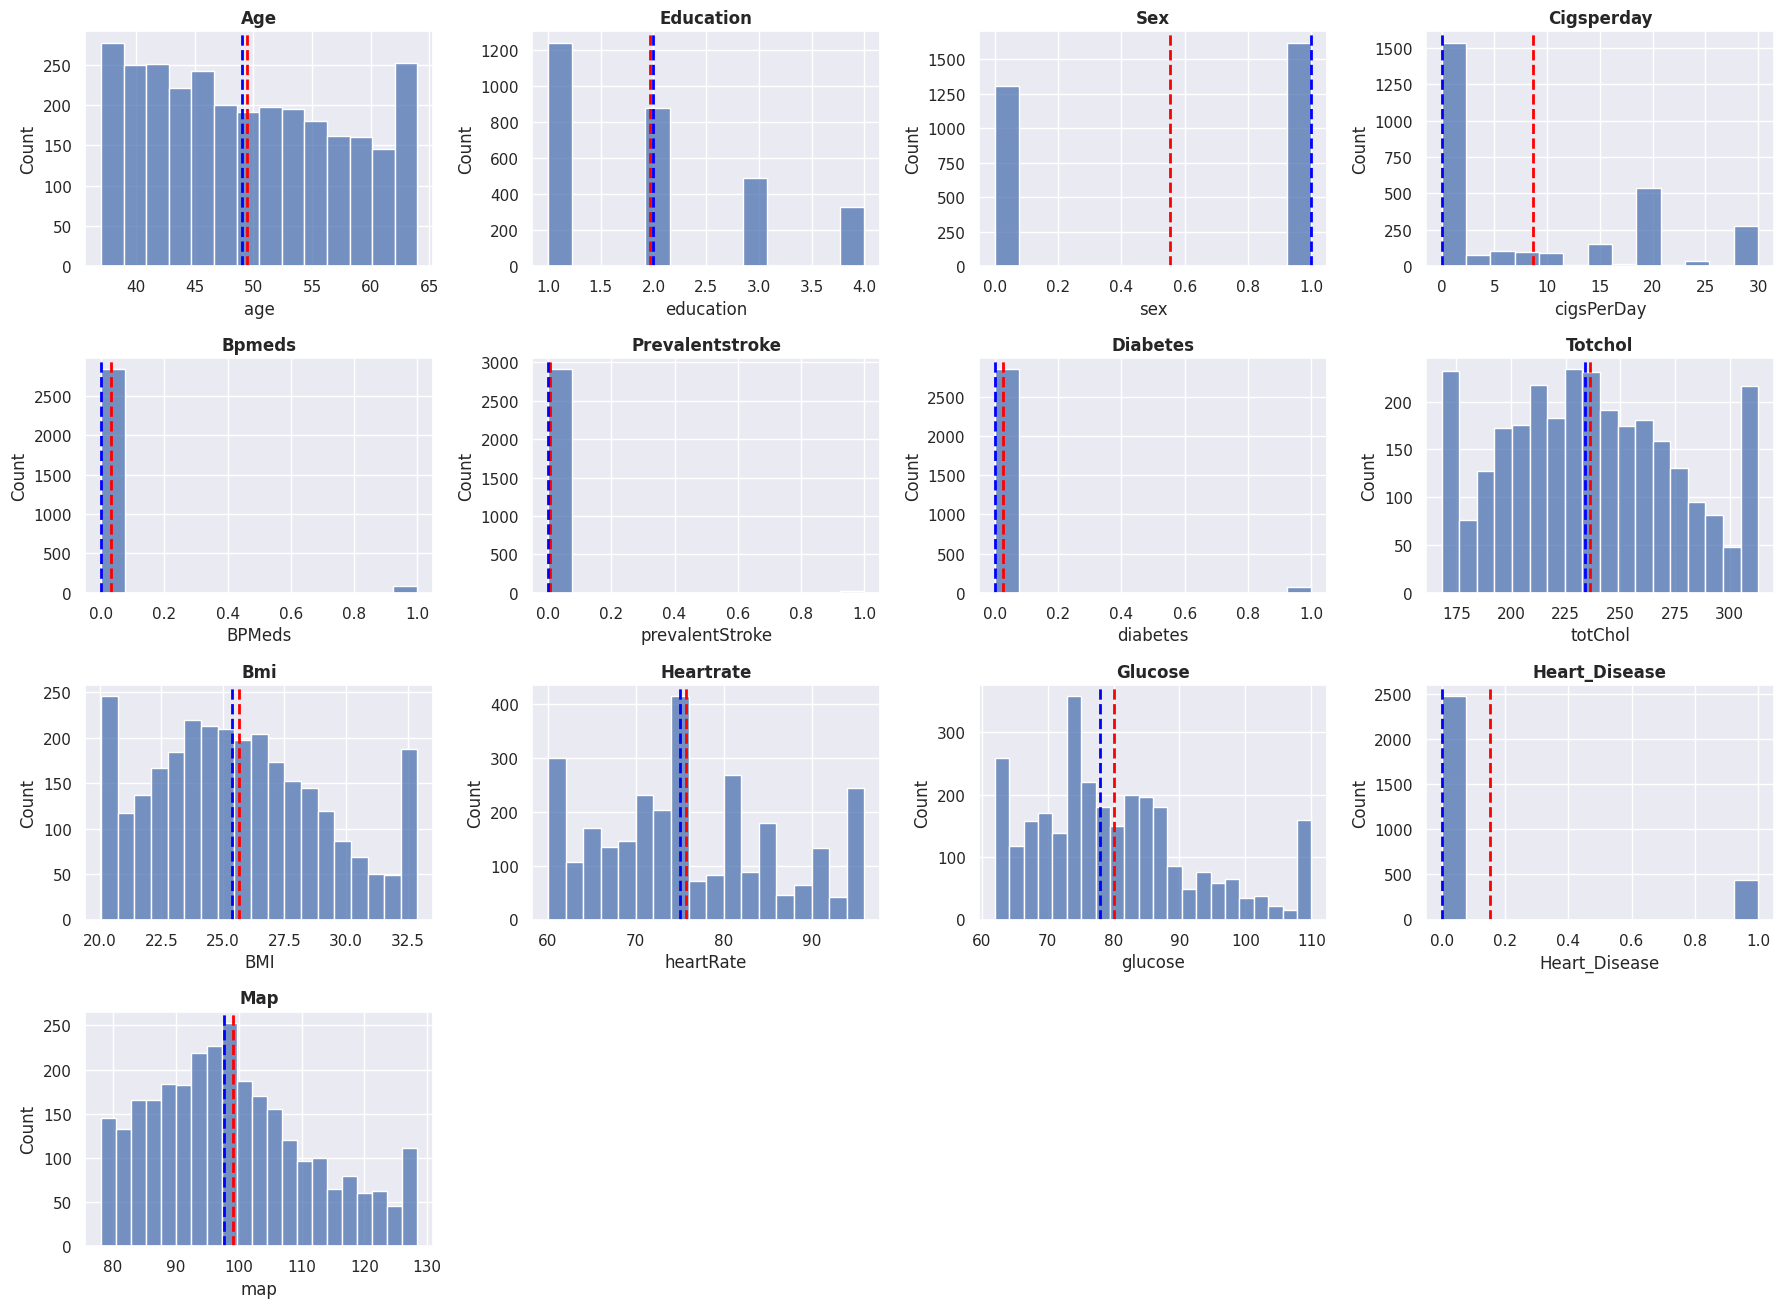

In [185]:
# Visualizing the mean and median lines for various attributes,
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   int64  
 3   cigsPerDay       2927 non-null   float64
 4   BPMeds           2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   diabetes         2927 non-null   int64  
 7   totChol          2927 non-null   float64
 8   BMI              2927 non-null   float64
 9   heartRate        2927 non-null   float64
 10  glucose          2927 non-null   float64
 11  Heart_Disease    2927 non-null   int64  
 12  map              2927 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 320.1 KB


##Bivariate Analysis

###1. BP Medication and Heart_Disease

[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

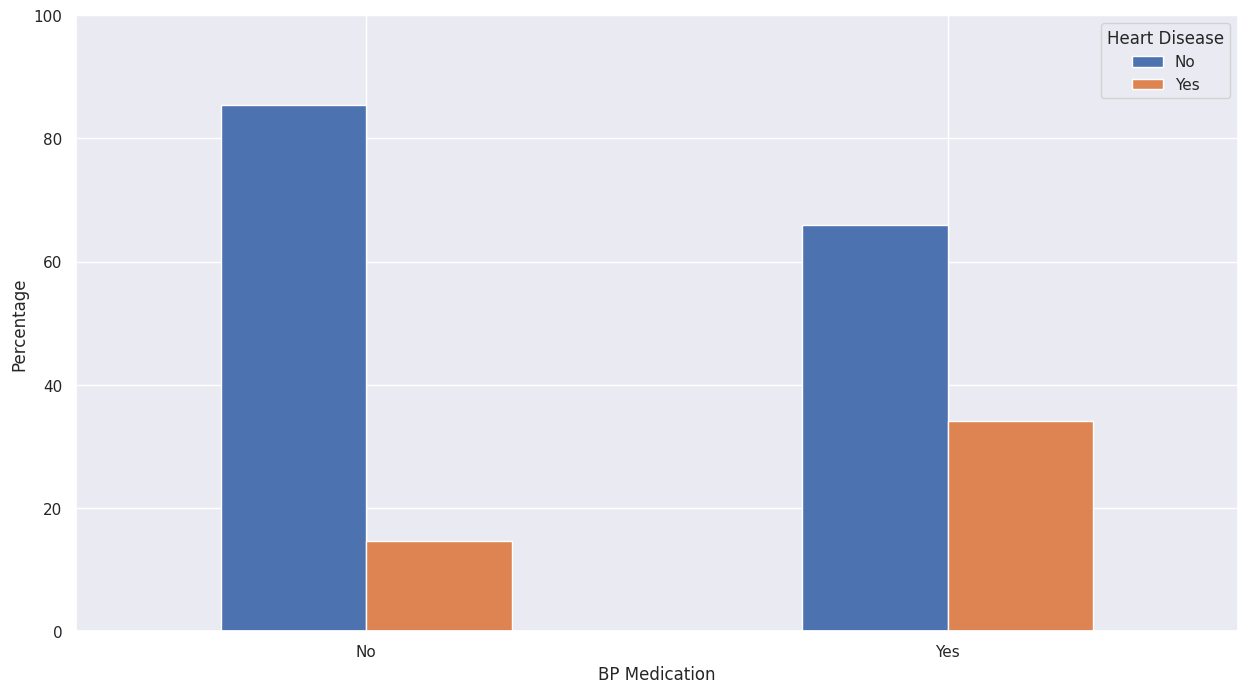

In [187]:
freq_df = df.groupby('Heart_Disease')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
ax=pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('BP Medication')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No','Yes'],title='Heart Disease')
ax.set(xticklabels = (['No','Yes']))


* According to the chart, People who take Blood pressure medication have a higher chance of suffering from heart disease.

###2. Prevalent Stroke and Heart_Disease

[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

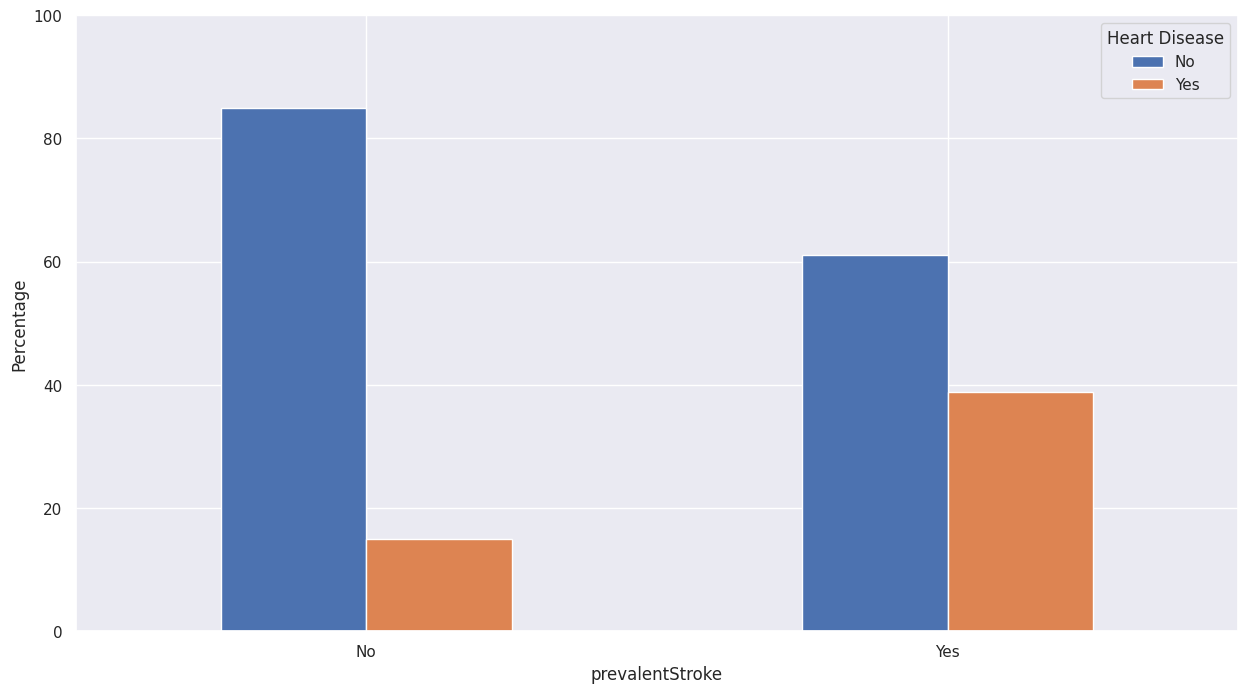

In [188]:
freq_df = df.groupby('Heart_Disease')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
ax=pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.legend(['No','Yes'],title='Heart Disease')
plt.xticks(rotation=0)
ax.set(xticklabels = (['No','Yes']))


* According to the chart, people who previously had a stroke are more likely to suffer from Heart Disease.

###3. sex and risk of Heart_Disease

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


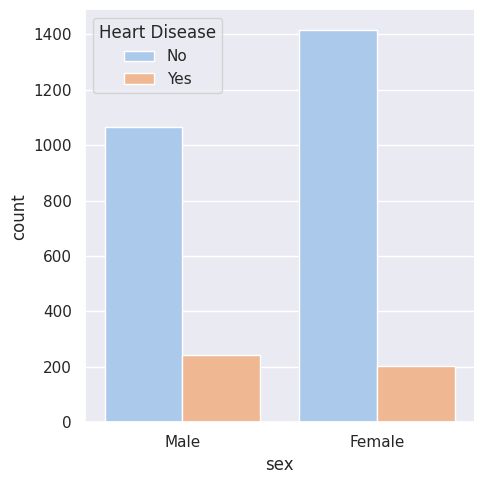

In [189]:
ax=sns.catplot(data= df, kind='count', x='sex', hue='Heart_Disease', palette='pastel',legend=False)
ax.set(xticklabels = (['Male','Female']))
plt.legend(['No','Yes'],title='Heart Disease')
plt.show()

* According to the bar chart, males are more prone to heart disease as compared to females.

###4.education and Heart_Disease

<ipython-input-190-dc074be36f1d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels = (['No','Yes']))


[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

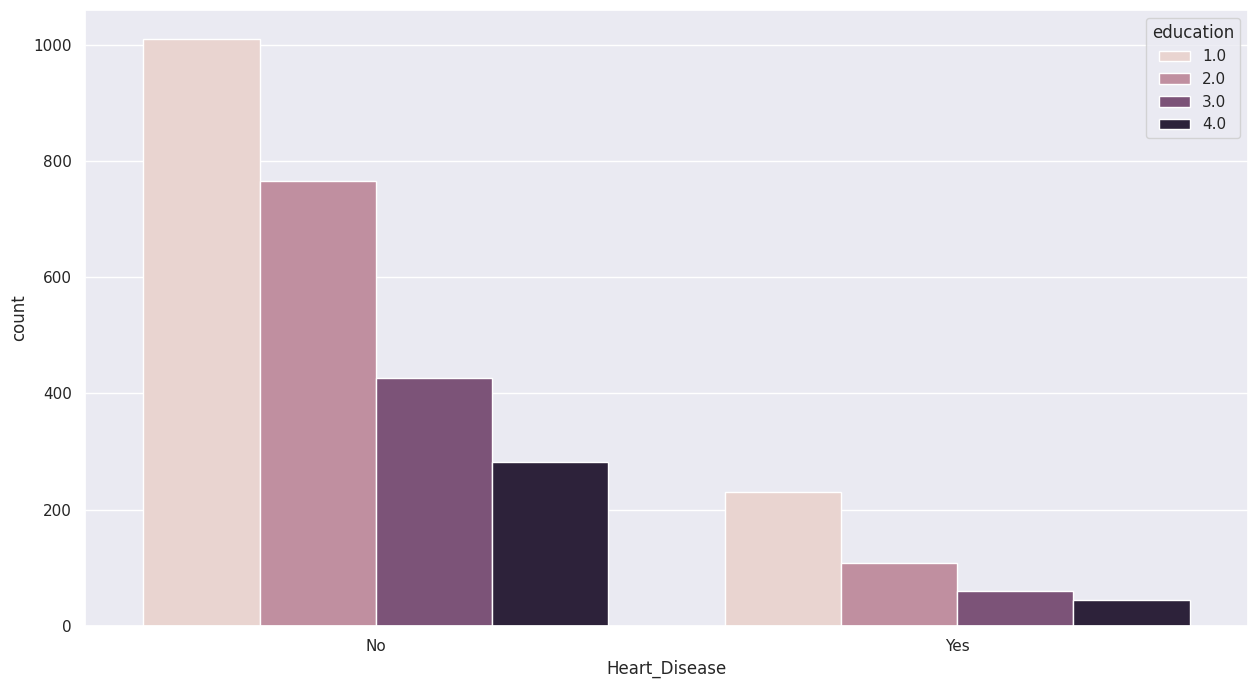

In [190]:
# count plot of education levels people having diseases
ax=sns.countplot(x ='Heart_Disease', hue ='education', data = df)
ax.set(xticklabels = (['No','Yes']))

* Education is not showing any strong connection with Heart_Disease, so we are droping this feature.

In [191]:
# droping education column
df.drop("education",axis=1,inplace=True)

###5. Diabetes and Heart_Disease

[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

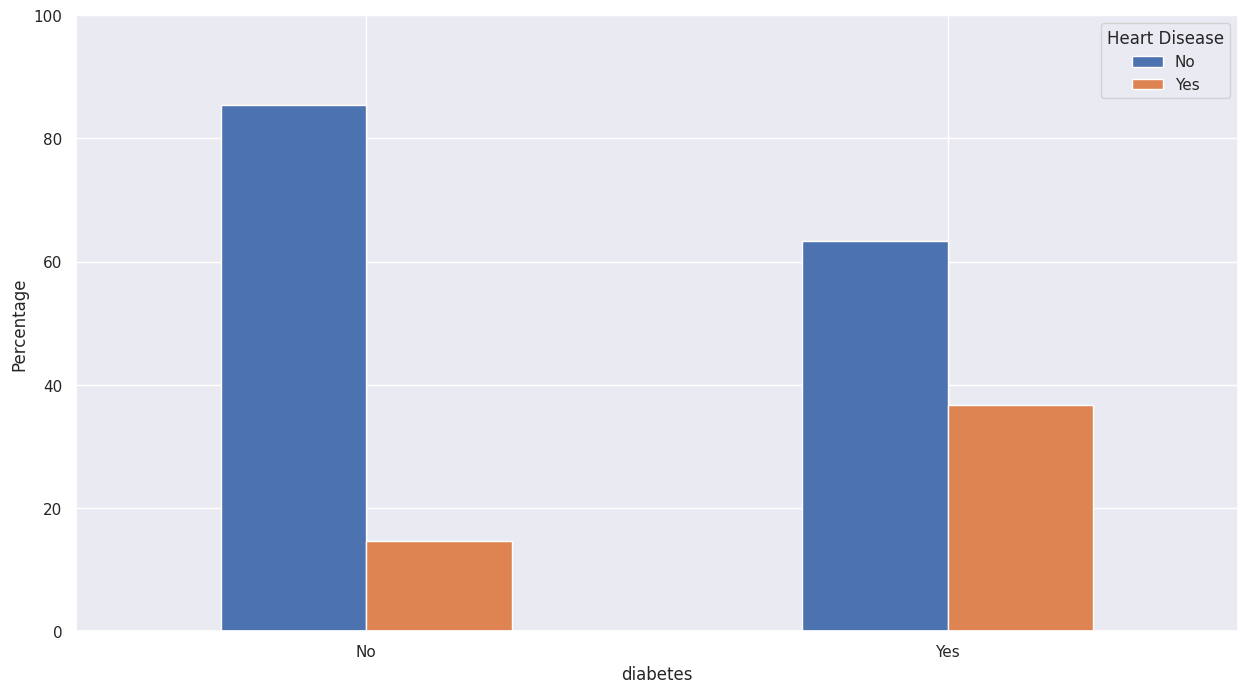

In [192]:
freq_df = df.groupby('Heart_Disease')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
ax=pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No','Yes'],title='Heart Disease')
ax.set(xticklabels = (['No','Yes']))

* According to the bar chart, Diabetic person is more likely to suffer from a heart disease.

#Conclusion- EDA
1. The dataset contains 85% normal persons and 15% heart patients
2. Given dataset consists of 55% male and 45% female.
3. Males are more prone to heart disease as compared to females.
4.As age increases, the chances of suffering from heart problems are more likely.
5. Higher BMI leads to higher chances of Heart Disease.
6. Higher cholesterol indicates the higher chances of getting Heart Disease.
7. If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension
8. People who take Blood pressure medication have a higher chance of suffering from heart disease.
9. People who previously had a stroke are more likely to suffer from Heart Disease.
10. Diabetic person is more likely to suffer from a heart disease.

#Models

##Dependent and independent variables

In [193]:
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('Heart_Disease',axis=1)
y = df['Heart_Disease']

## Handling imbalance data using SMOTE

####**WHAT IS SMOTE ?**
This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases.

In [194]:
pip install imblearn

In [195]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [196]:
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

##Train test split

In [197]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.20)

##Data Standardization

In [198]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

##1.Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [200]:
# Get the model coefficients
lr_model.coef_

array([[ 0.6283061 , -0.60152869,  0.1377969 ,  0.12413276, -0.02942631,
        -0.07898516,  0.1654776 , -0.01082097, -0.02864263,  0.12250461,
         0.29385407]])

In [201]:
lr_model.intercept_

array([-0.27934787])

In [202]:
train_pred = lr_model.predict_proba(X_train)
test_pred = lr_model.predict_proba(X_test)

In [203]:
test_pred

array([[0.65881215, 0.34118785],
       [0.86241741, 0.13758259],
       [0.2323238 , 0.7676762 ],
       ...,
       [0.23672647, 0.76327353],
       [0.52984055, 0.47015945],
       [0.29323035, 0.70676965]])

In [204]:
# Get the predicted classes
X_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [205]:
#predicting probability
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

In [206]:
# Defining a function to train the input model and print evaluation matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = X
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)
        # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Report')
    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

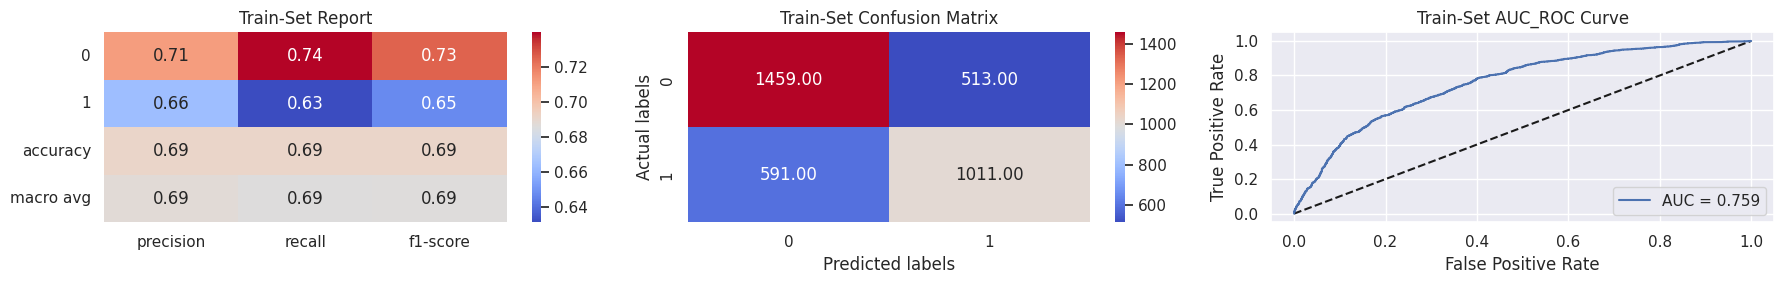

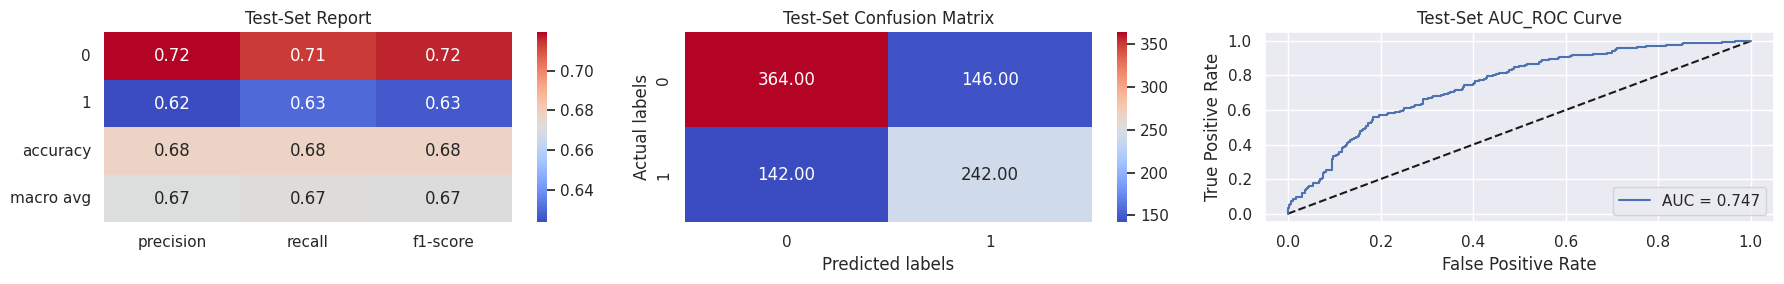

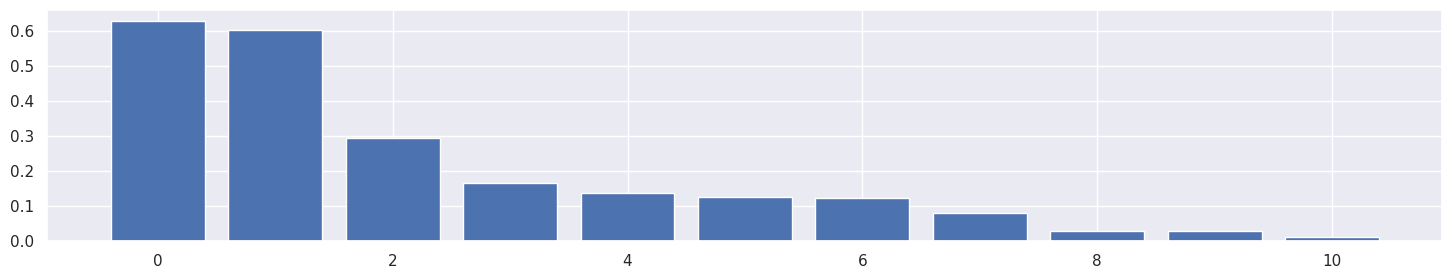

LogisticRegression(max_iter=10000)

In [207]:
# Analysing logistic Regression model
analyse_model(lr_model,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.677852,0.623711,0.630208,0.713725,0.626943,0.746783


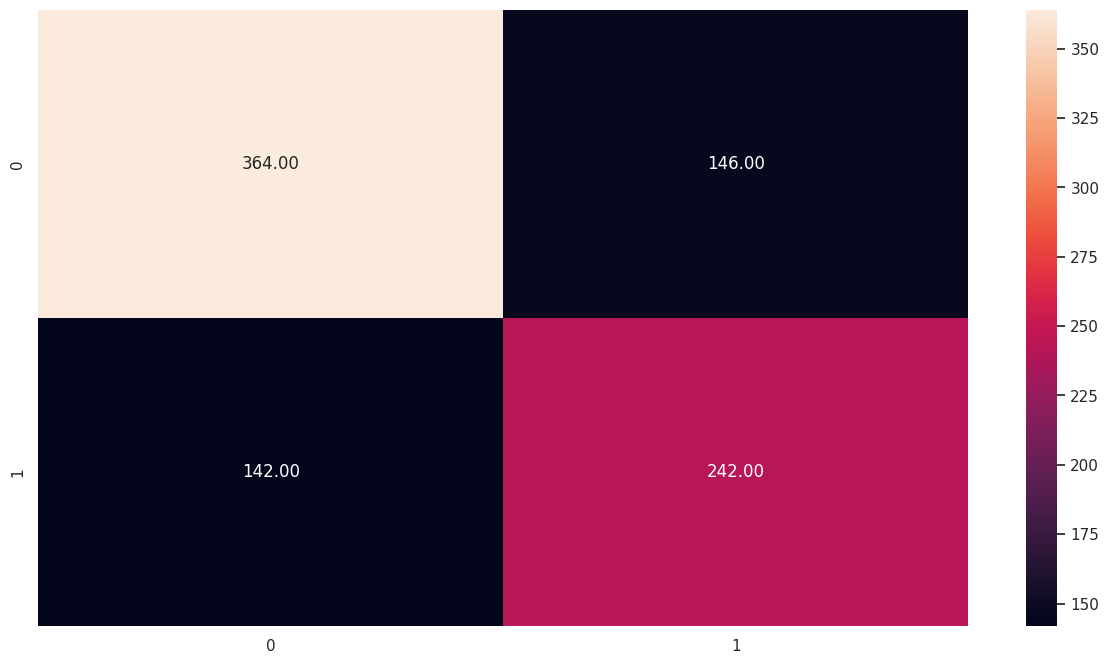

In [208]:
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True,fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_proba_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics1 =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics1

##2.KNN Model

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)

# Fit the object to train dataset
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [210]:
#printing best parameters
knn_cv.best_params_

{'n_neighbors': 1}

In [211]:
#predicting
y_pred_knn = knn_cv.predict(X_test)

#predicting probability
y_pred_proba_knn = knn_cv.predict_proba(X_test)[:,1]

Model Evaluation

In [212]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


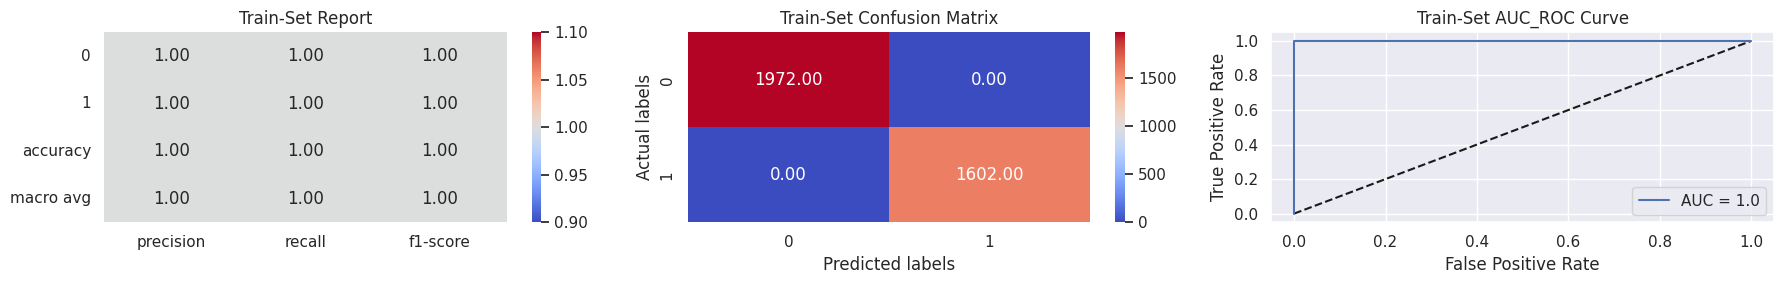

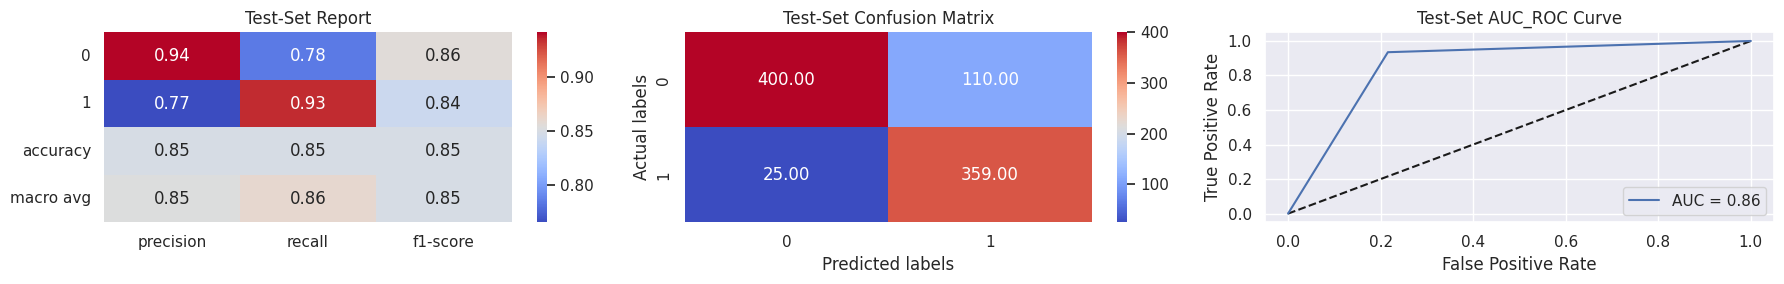

<Figure size 1800x300 with 0 Axes>

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [213]:
# Analysing KNN model
analyse_model(knn_cv,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,KNN,0.848993,0.765458,0.934896,0.784314,0.841735,0.859605


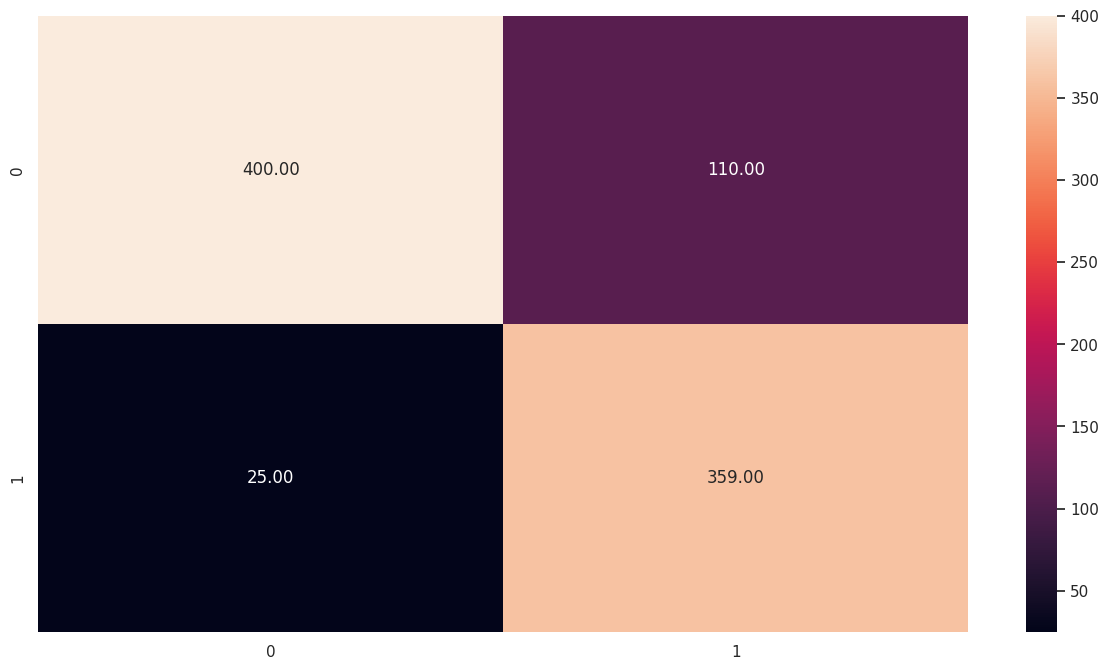

In [214]:
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_proba_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics2 =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

##3.Decision Tree Classifier

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
# Decision Tree
dtc = DecisionTreeClassifier()

# Fitting model
dtc.fit(X_train,y_train)

#predicting
y_pred_dtc = dtc.predict(X_test)

#predicting probability
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

Model Evaluation

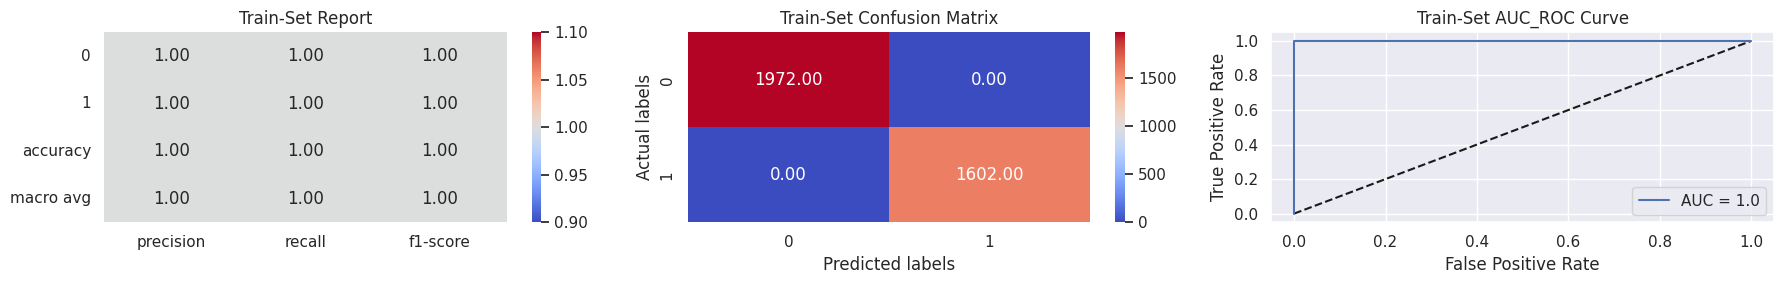

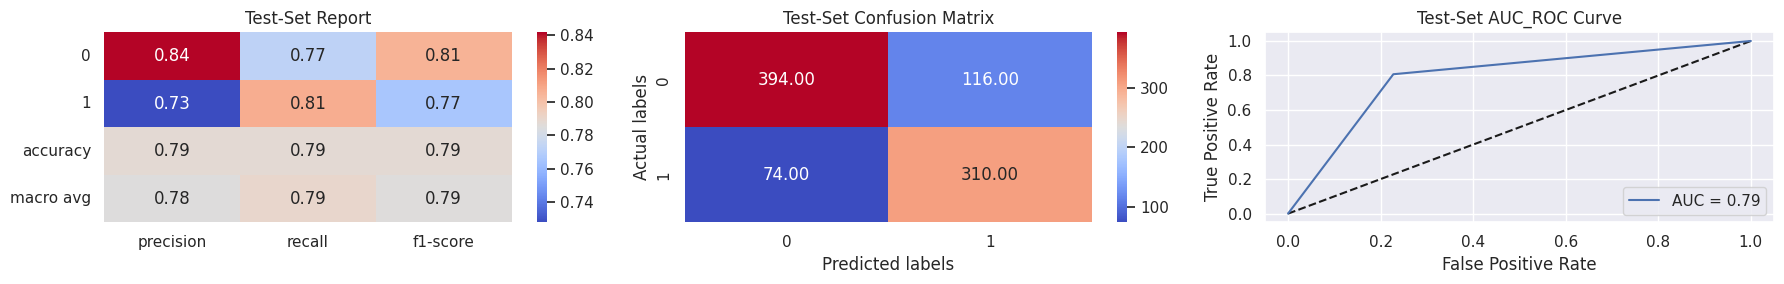

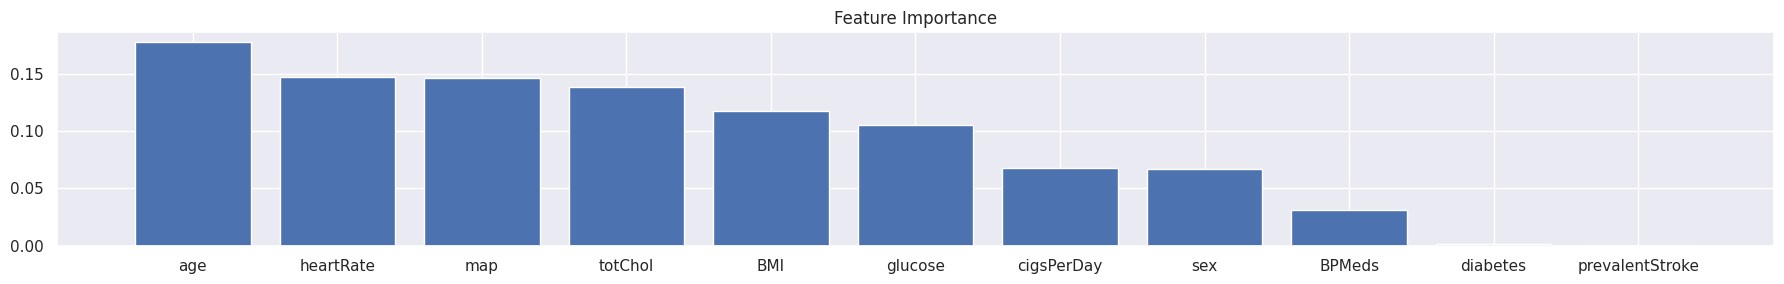

DecisionTreeClassifier()

In [217]:
#Analysing Decision Tree model
analyse_model(dtc,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,DecisionTree,0.787472,0.7277,0.807292,0.772549,0.765432,0.78992


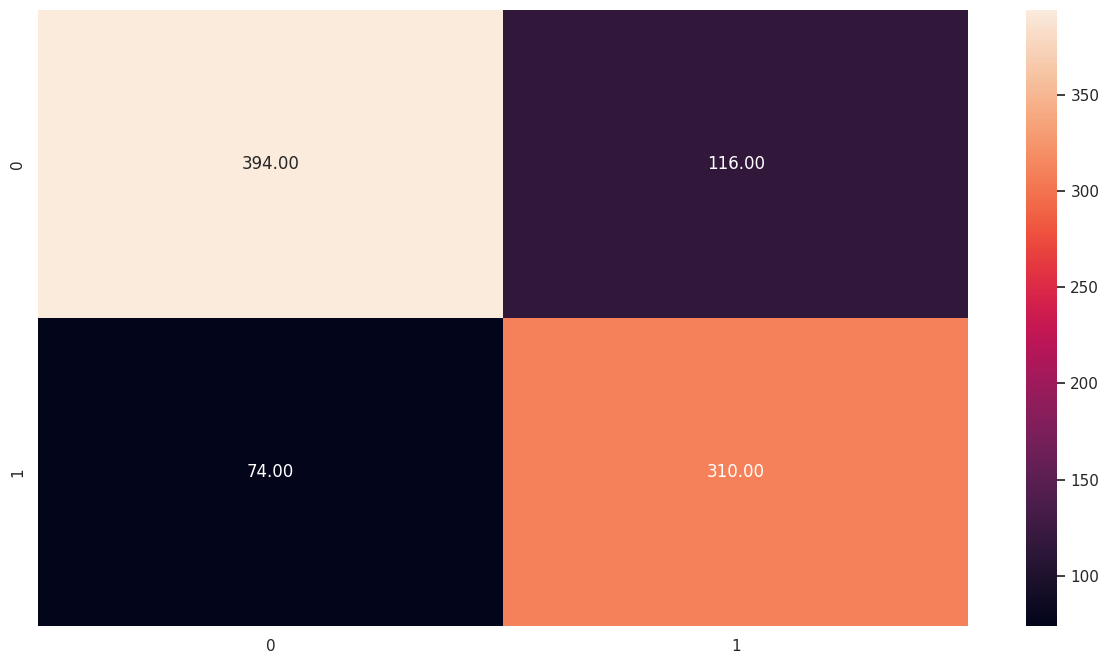

In [218]:
# evaluation metric and confusion matrix for Decision Tree clssi model
CM=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_dtc)
roc=roc_auc_score(y_test, y_pred_proba_dtc)
prec = precision_score(y_test, y_pred_dtc)
rec = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)

evaluation_metrics3 =pd.DataFrame([['DecisionTree',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics3

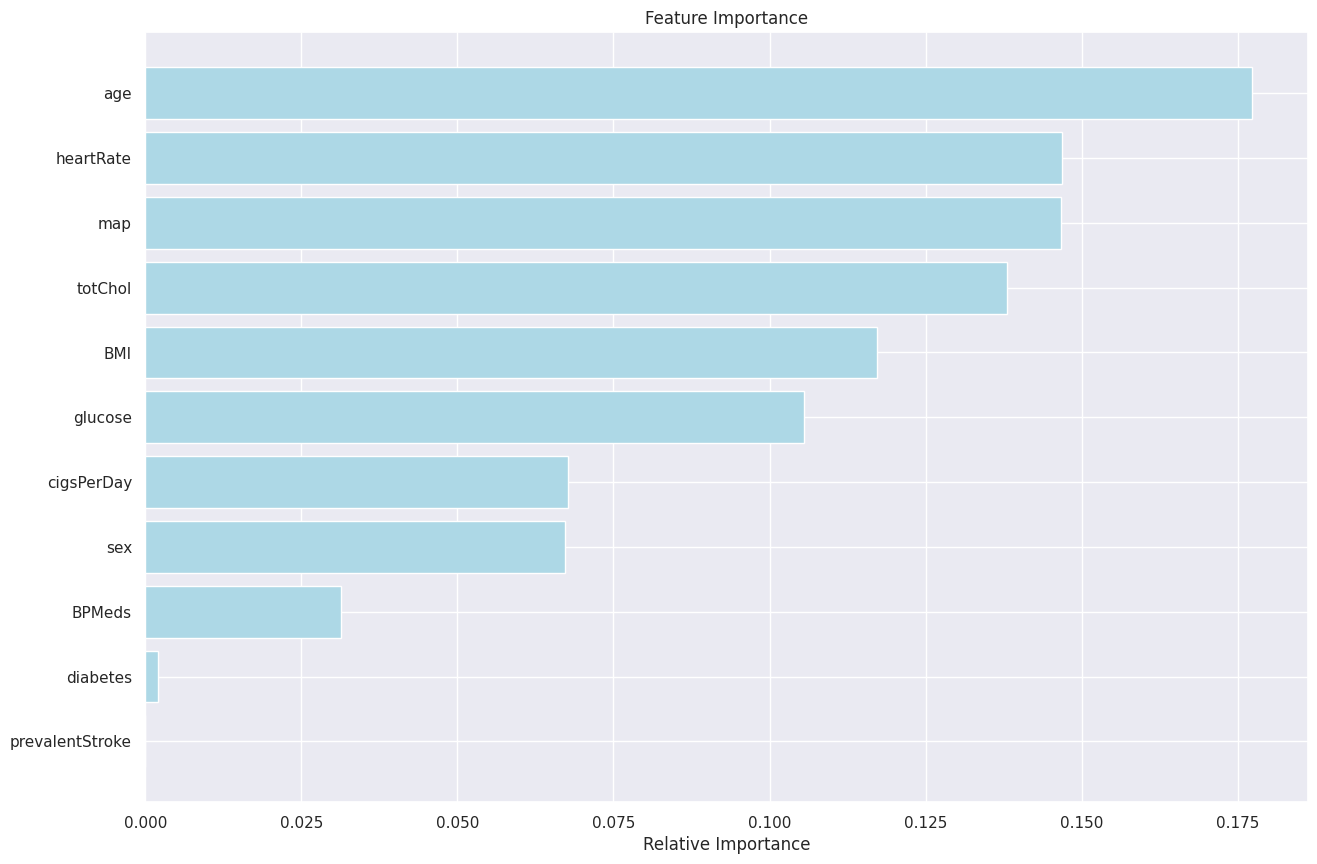

In [219]:
#shows the graph of feature importance
features = X.columns
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##4.Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier_sm = RandomForestClassifier()
grid_values_sm = {'n_estimators':[90,100,110], 'max_leaf_nodes':[110,115,120], 'max_depth':[13,14,15]}
classifier = GridSearchCV(classifier_sm, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

In [221]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [222]:
#printing best parameters
classifier.best_params_

{'max_depth': 15, 'max_leaf_nodes': 120, 'n_estimators': 90}

In [223]:
#predicting
y_pred_rf =classifier.predict(X_test)

#predicting probability
y_pred_proba_rf = classifier.predict_proba(X_test)[:,1]

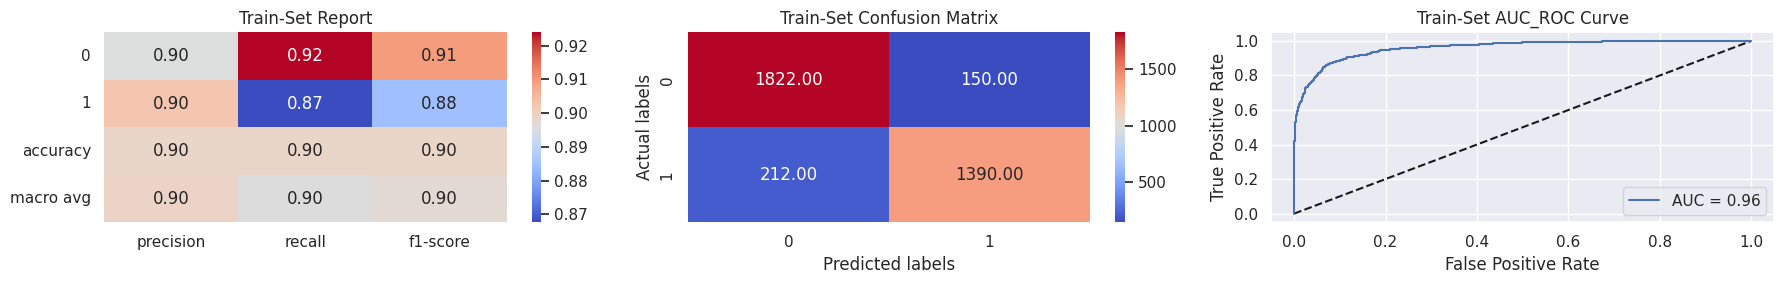

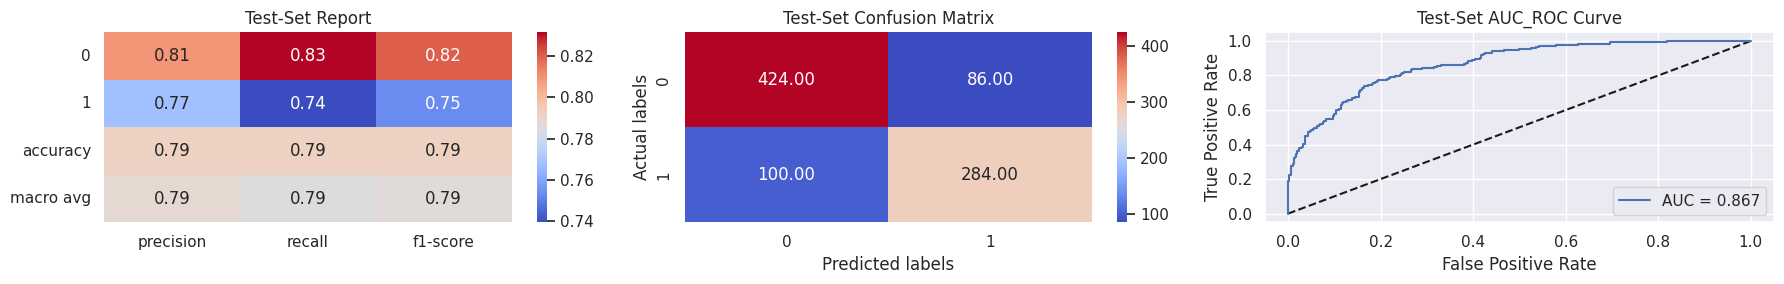

<Figure size 1800x300 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [224]:
# Analysing model Random forest model
analyse_model(classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Random Forest,0.791946,0.767568,0.739583,0.831373,0.753316,0.867499


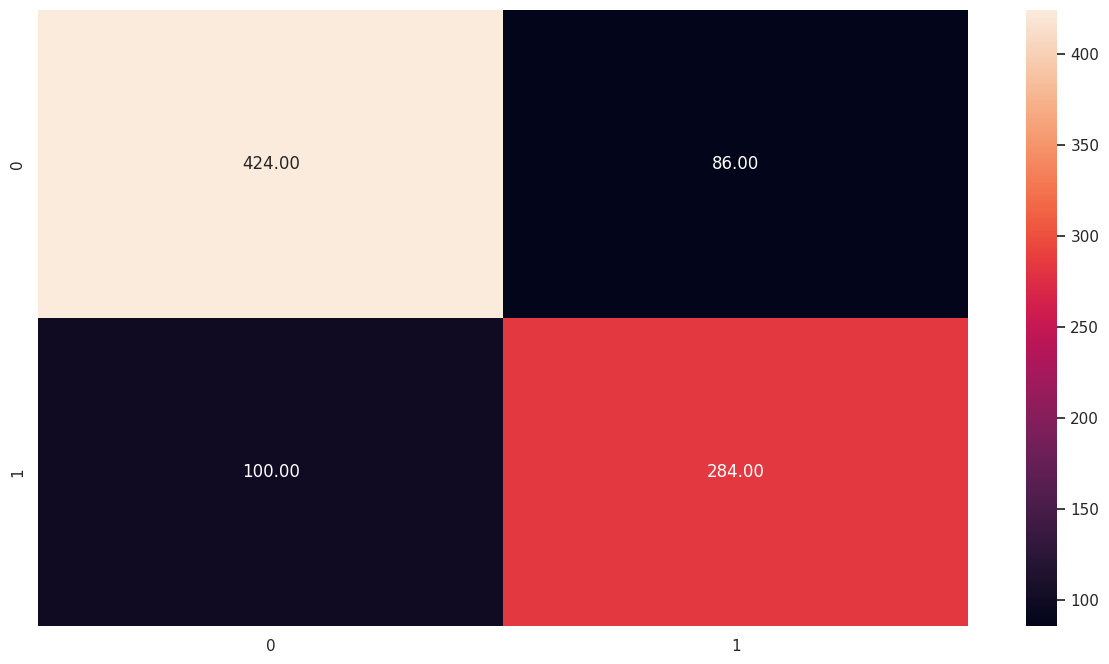

In [225]:
# evaluation metric and confusion matrix for Random Forest model
CM=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_proba_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

evaluation_metrics4 =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics4

In [226]:
optimal_rf=classifier.best_estimator_

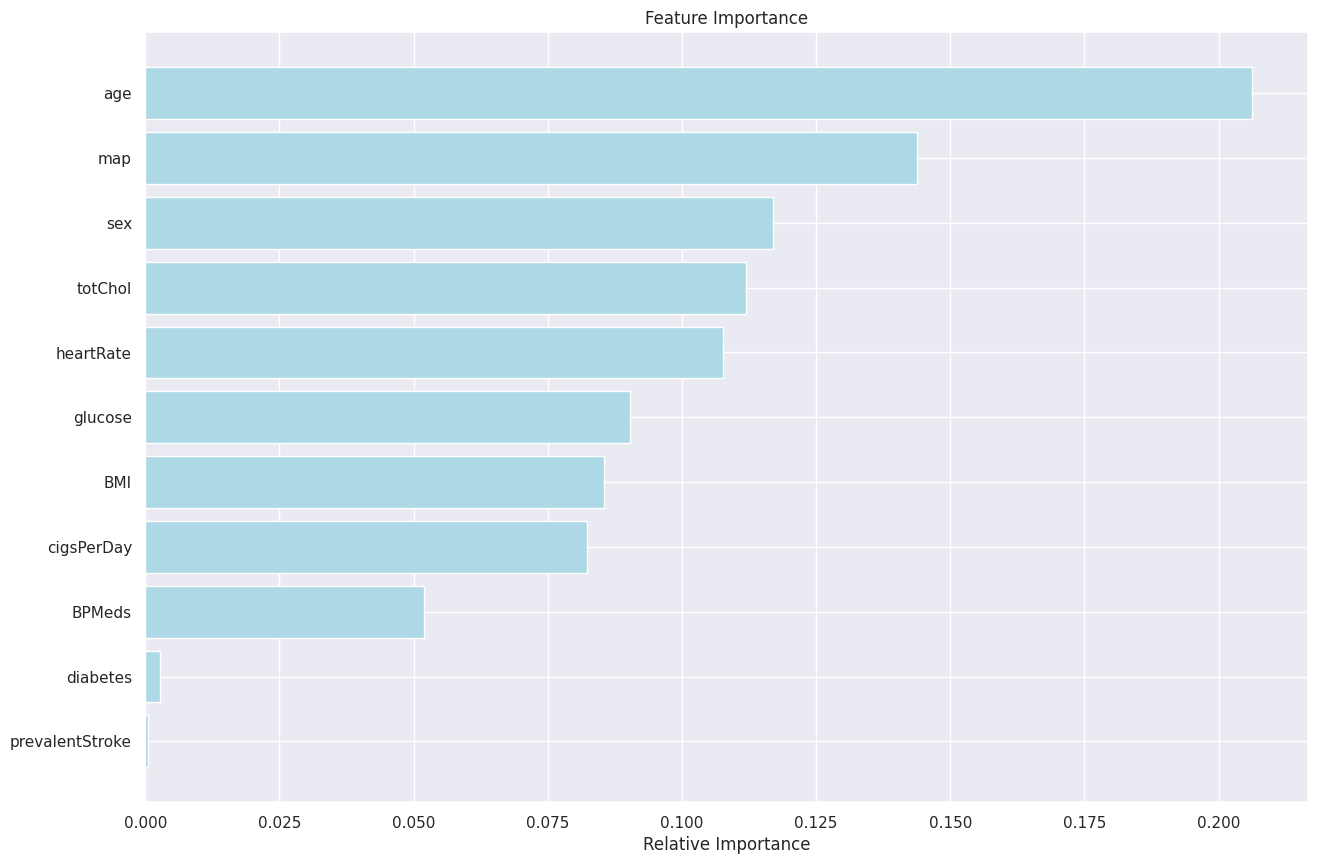

In [227]:
#shows the graph of feature importance
features = X.columns
importances = optimal_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##5.Gradient Boost Classifier

In [228]:
#importing gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
gb_model = GradientBoostingClassifier()

In [230]:
# creating param dict to check different value of parameter
n_estimators=[185,190,195]
max_depth=[11,12,13]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [231]:
#grid search for gradient boosting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': [185, 190, 195]})

In [232]:
#printing best parameter
gb_grid.best_params_

{'max_depth': 11, 'n_estimators': 190}

In [233]:
#predicting
y_pred_gbm = gb_grid.predict(X_test)

#predicting probability
y_pred_proba_gbm = gb_grid.predict_proba(X_test)[:,1]

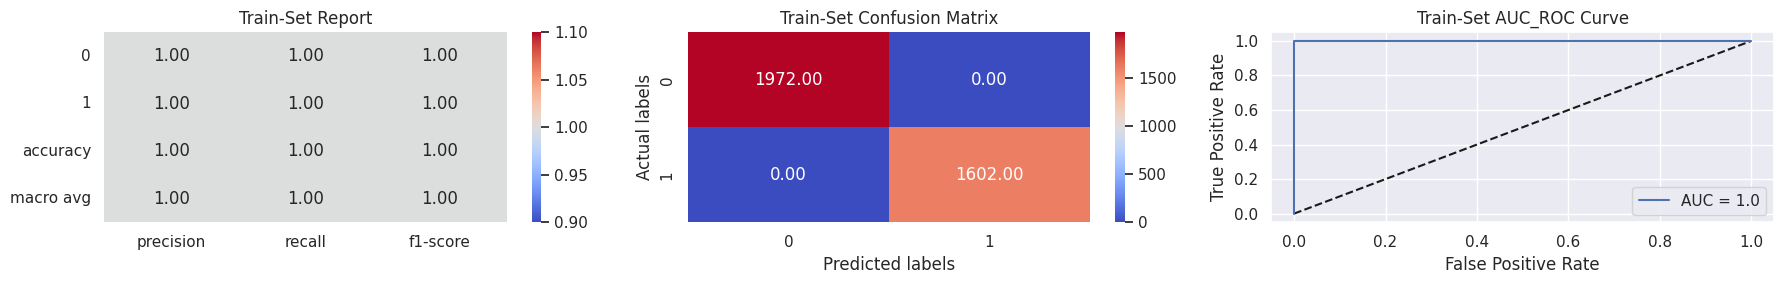

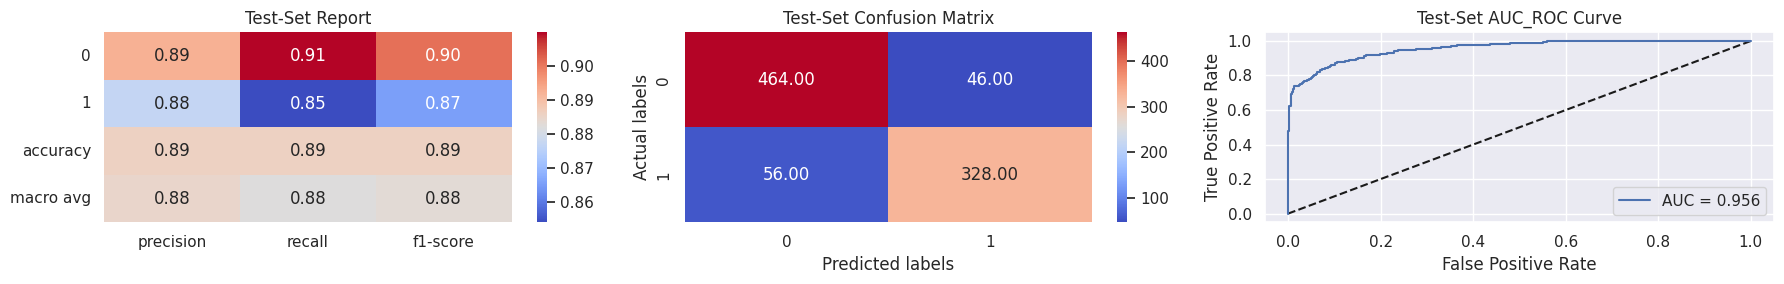

<Figure size 1800x300 with 0 Axes>

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': [185, 190, 195]})

In [234]:
# Analysing Gradient Boost model
analyse_model(gb_grid,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,GradientBoosting,0.885906,0.877005,0.854167,0.909804,0.865435,0.955898


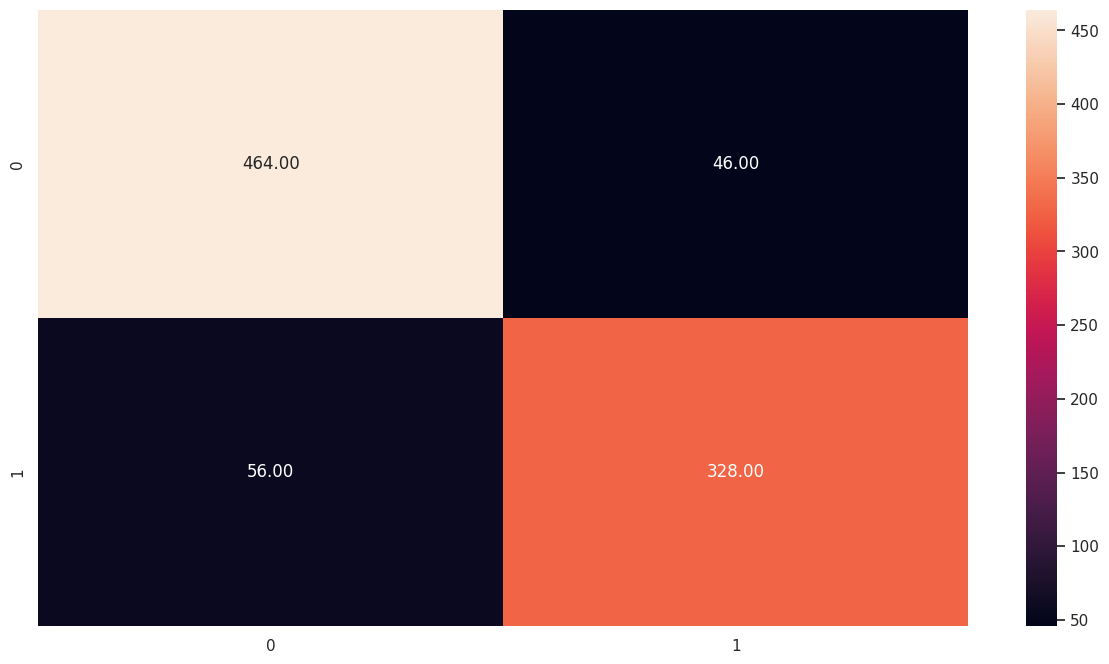

In [235]:
# evaluation metric and confusion matrix for Gradient Boost model
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_proba_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

evaluation_metrics5 =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics5

In [236]:
optimal_gb=gb_grid.best_estimator_

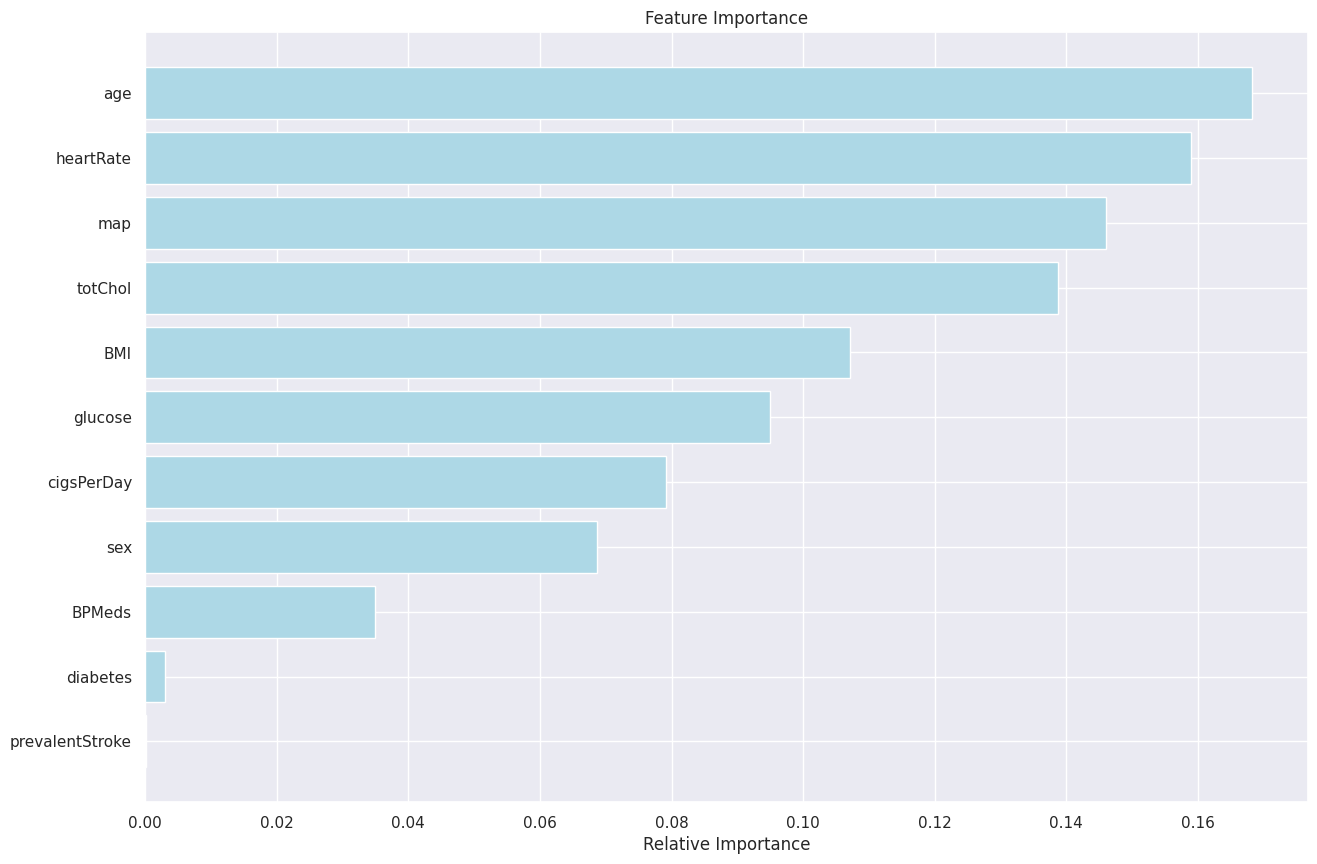

In [237]:
#shows the graph of feature importance
features = X.columns
importances = optimal_gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##6.XGBoost

In [238]:
# importing XG Boost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

#creating param dict for gridsearch
n_estimators=[170,175,180]
max_depth=[20,25,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

#creating xgb grid model
xgb= GridSearchCV(xgb_model,param_grid=params,verbose=0)

# Fitting model
xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [239]:
#printing best parameters
xgb.best_params_

{'max_depth': 20, 'n_estimators': 175}

In [240]:
#predicting
y_pred_xgb = xgb.predict(X_test)

#predicting probability
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

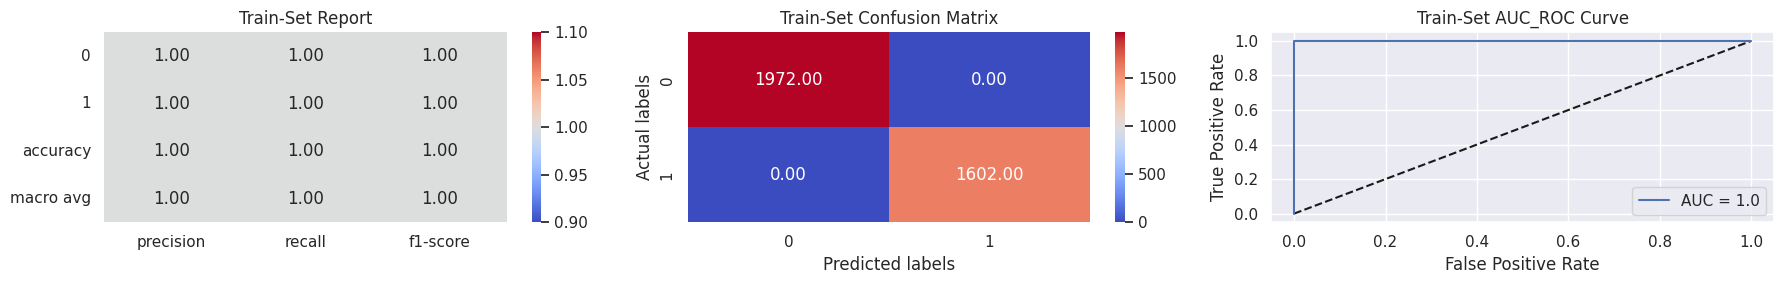

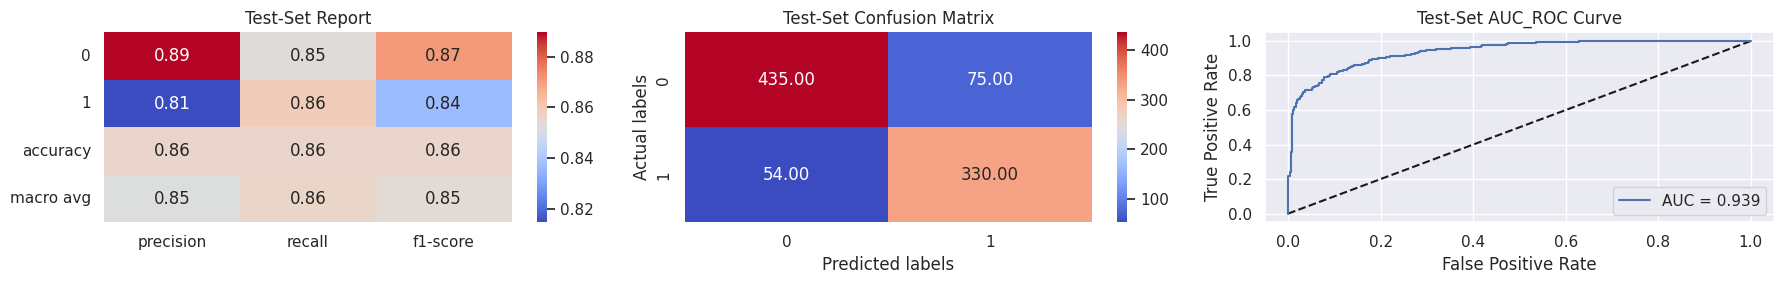

<Figure size 1800x300 with 0 Axes>

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [241]:
# Analysing XG Boost model
analyse_model(xgb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,XGBoost,0.855705,0.814815,0.859375,0.852941,0.836502,0.938639


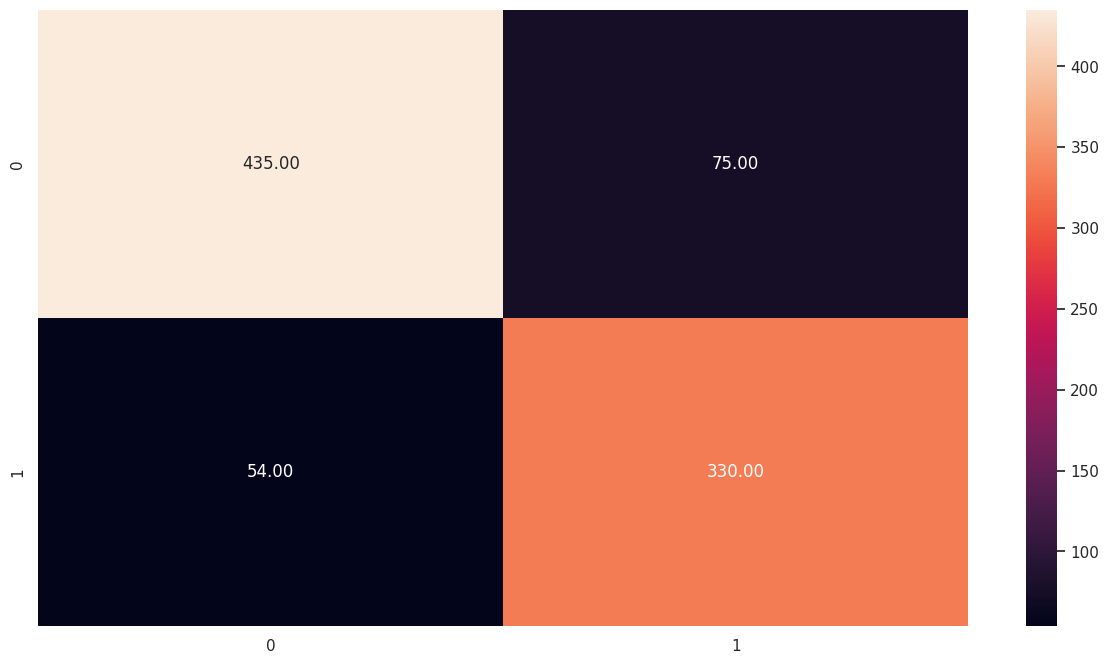

In [242]:
# evaluation metric and confusion matrix for XG Boost model
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_proba_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics6 =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics6

In [243]:
# finding best estimator
optimal_xgb=xgb.best_estimator_

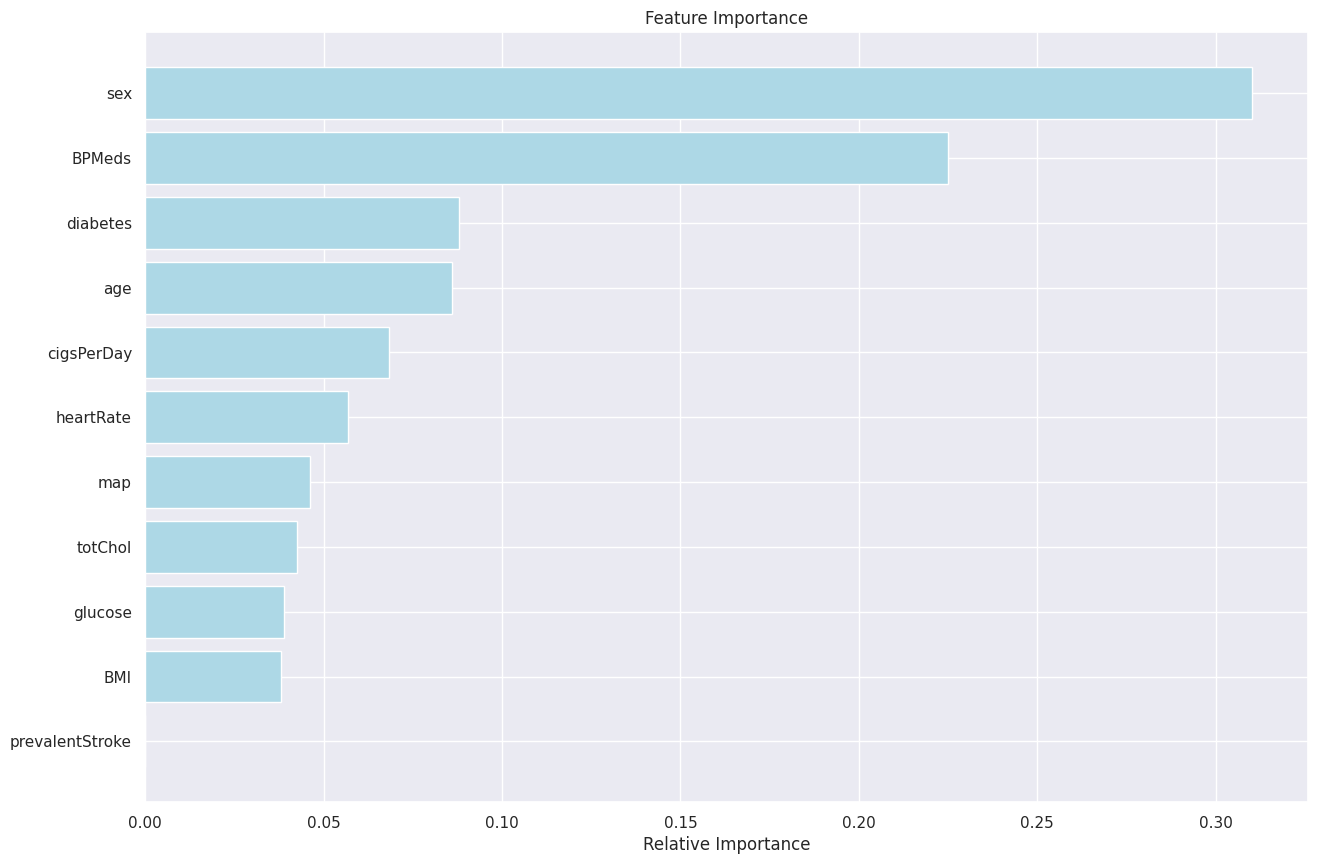

In [244]:
#shows the graph of feature importance
features = X.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##7.Naive Bayes Classifier

In [245]:
from sklearn.naive_bayes import GaussianNB

In [246]:
# Creating naive bayes model
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_train, y_train)

# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)

In [247]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_pred_gnb, y_test))

0.6812080536912751


In [248]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

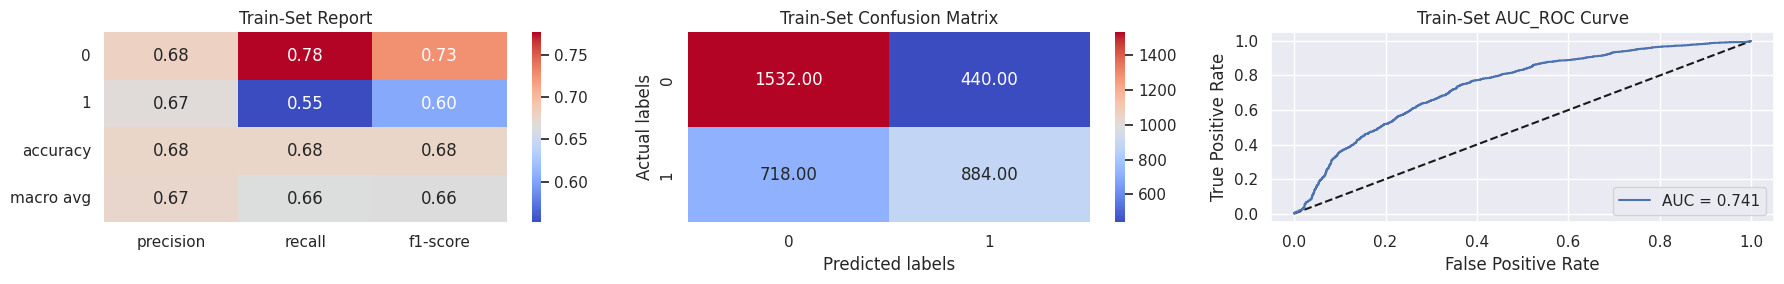

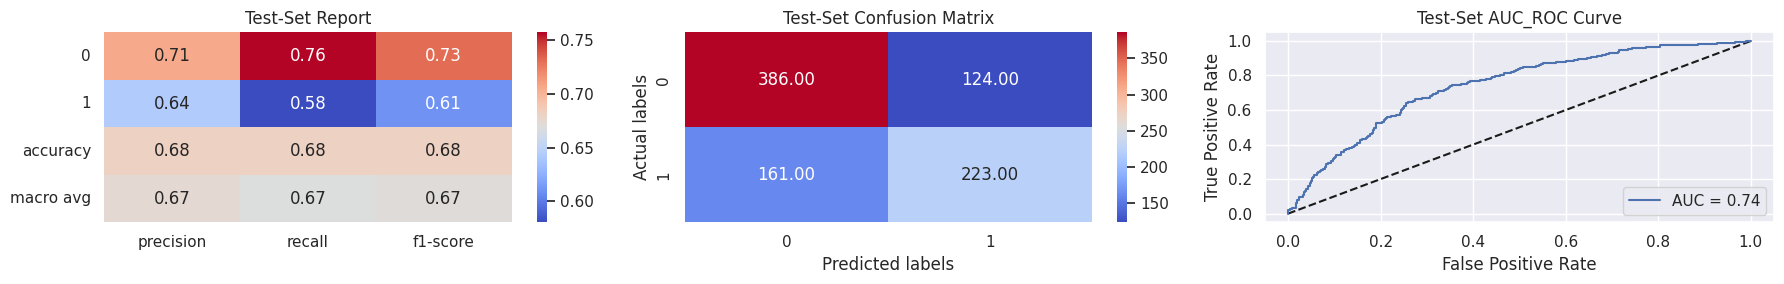

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [249]:
# Analysing Naive Bayes model
analyse_model(gnb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Naive Bayes,0.681208,0.642651,0.580729,0.756863,0.610123,0.740181


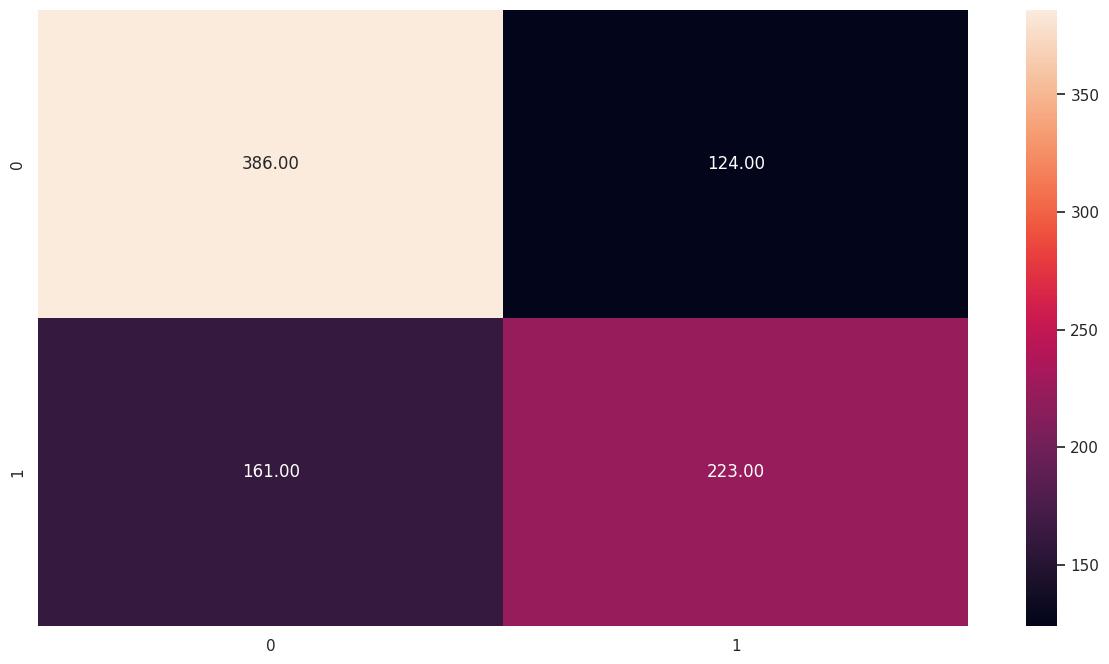

In [250]:
# evaluation metric and confusion matrix for Naive Bayes classifier model
CM=confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gnb)
roc=roc_auc_score(y_test, y_pred_proba_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

evaluation_metrics7 =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics7

##8.Support Vector Classifier

In [251]:
# importing support vector classifier
from sklearn.svm import SVC

In [252]:
# Support vector classifier
svc = SVC()

# running grid search for optimal parameters
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.1,0.01],
              'kernel': ['linear','rbf','sigmoid'],
              'probability':[True]}

svm_classifier = GridSearchCV(svc, param_grid,cv=2)

#fitting model
svm_classifier.fit(X_train,y_train)

#Predicting
y_pred_svc = svm_classifier.predict(X_test)

#predicting probability
y_pred_proba_svc = svm_classifier.predict_proba(X_test)[:,1]

In [253]:
# Support vector classification model's best parameters
svm_classifier.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}

Model Evaluation

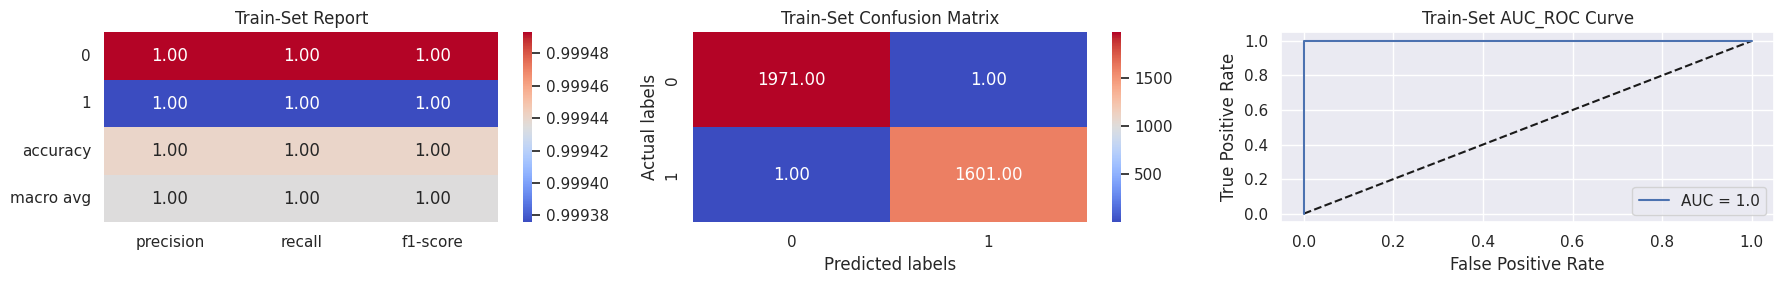

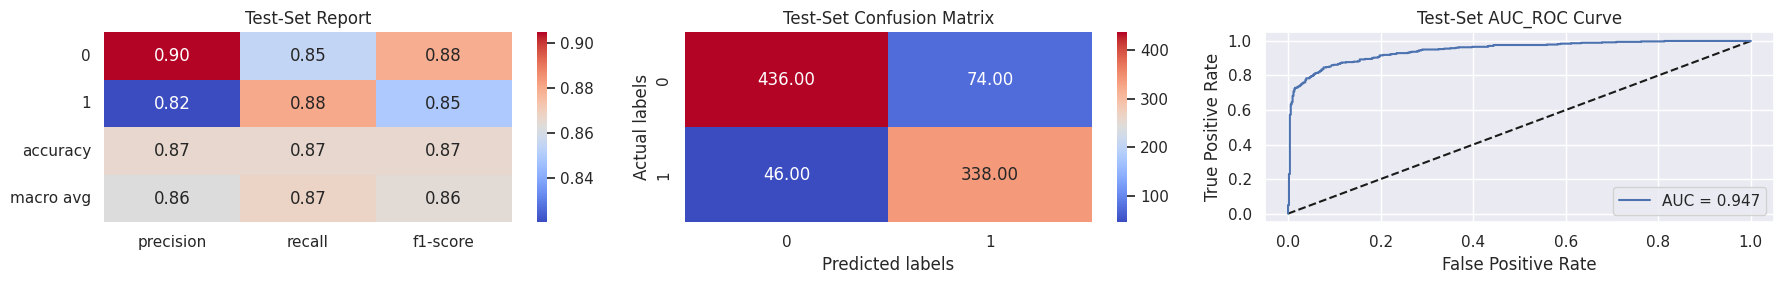

<Figure size 1800x300 with 0 Axes>

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True]})

In [254]:
# Analysing Support vector classication model
analyse_model(svm_classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,SupportVector,0.865772,0.820388,0.880208,0.854902,0.849246,0.946959


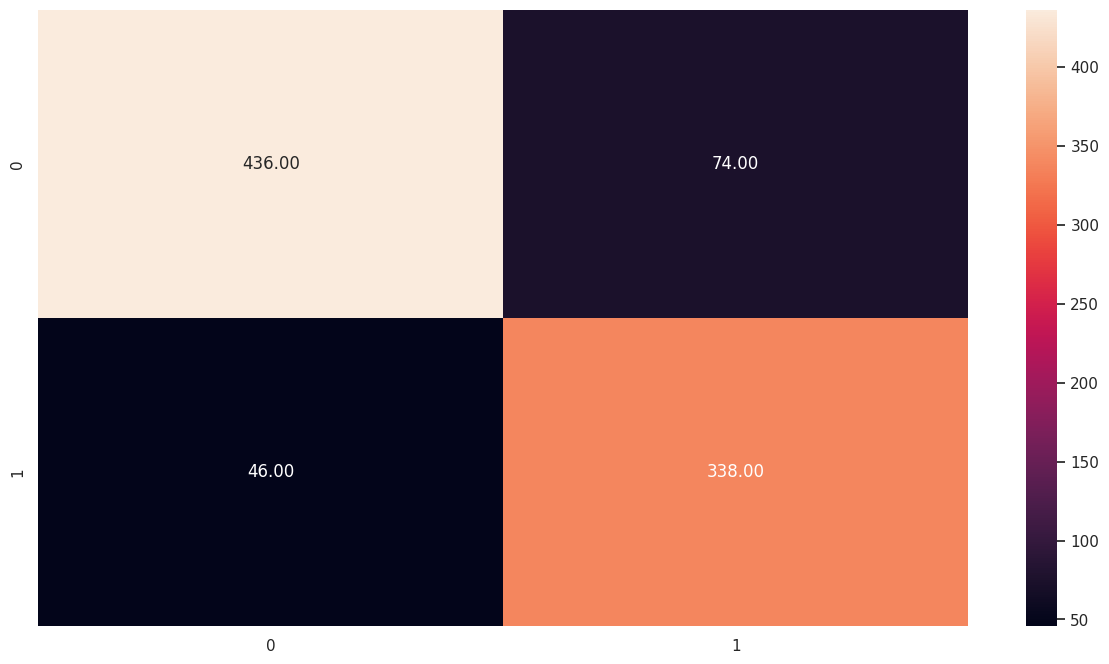

In [255]:
# evaluation metric and confusion matrix for support vector model
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_proba_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics8 =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics8

#Models' Evaluation Matrix

In [256]:
# Evaluation metrics list
evaluation_metrics = [evaluation_metrics1,evaluation_metrics2,evaluation_metrics3,
                      evaluation_metrics4,evaluation_metrics5,evaluation_metrics6,
                      evaluation_metrics7,evaluation_metrics8]

In [257]:
# Concatnating all evaluation metrics into one DataFrame
em_list=pd.concat(evaluation_metrics).reset_index(drop=True).set_index('Model')

# using seaborn color palette as well as
# min('lighblue'), mid(green), max('blue') values
cm = sns.light_palette("lightgreen", as_cmap=True)
em_list.style.background_gradient(cmap=cm).set_precision(2).highlight_min(axis=0, color='lightgreen').highlight_max(axis=0, color='green')

,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
Model,,,,,,
Logistic Regression,0.68,0.62,0.63,0.71,0.63,0.75
KNN,0.85,0.77,0.93,0.78,0.84,0.86
DecisionTree,0.79,0.73,0.81,0.77,0.77,0.79
Random Forest,0.79,0.77,0.74,0.83,0.75,0.87
GradientBoosting,0.89,0.88,0.85,0.91,0.87,0.96
XGBoost,0.86,0.81,0.86,0.85,0.84,0.94
Naive Bayes,0.68,0.64,0.58,0.76,0.61,0.74
SupportVector,0.87,0.82,0.88,0.85,0.85,0.95


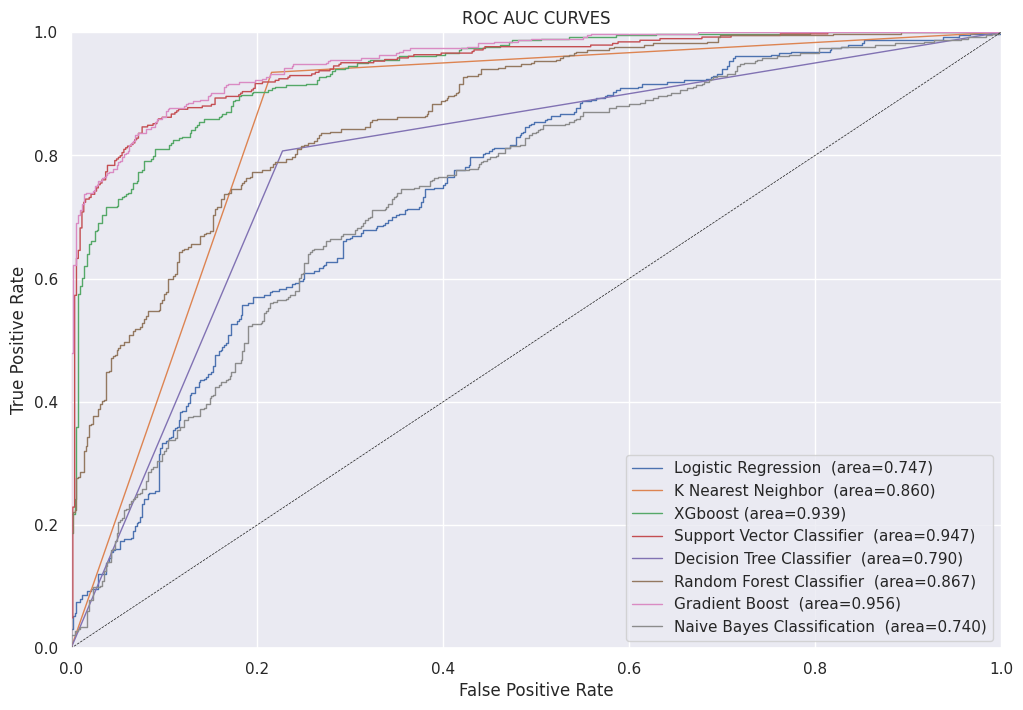

In [258]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,lr_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn_cv.predict_proba(X_test),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_classifier.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,dtc.predict_proba(X_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,classifier.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,gb_grid.predict_proba(X_test),label='Gradient Boost ',l='-')
roc_auc_plot(y_test,gnb.predict_proba(X_test),label='Naive Bayes Classification ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

Here, we can see the highest average area under the curve (AUC) of 0.94 is attained by Gradient Boost Classifier and second highest is of 0.93 attained by Support Vector Classifier.

<ipython-input-259-708e4025aef2>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')


<Axes: xlabel='Model', ylabel='Accuracy'>

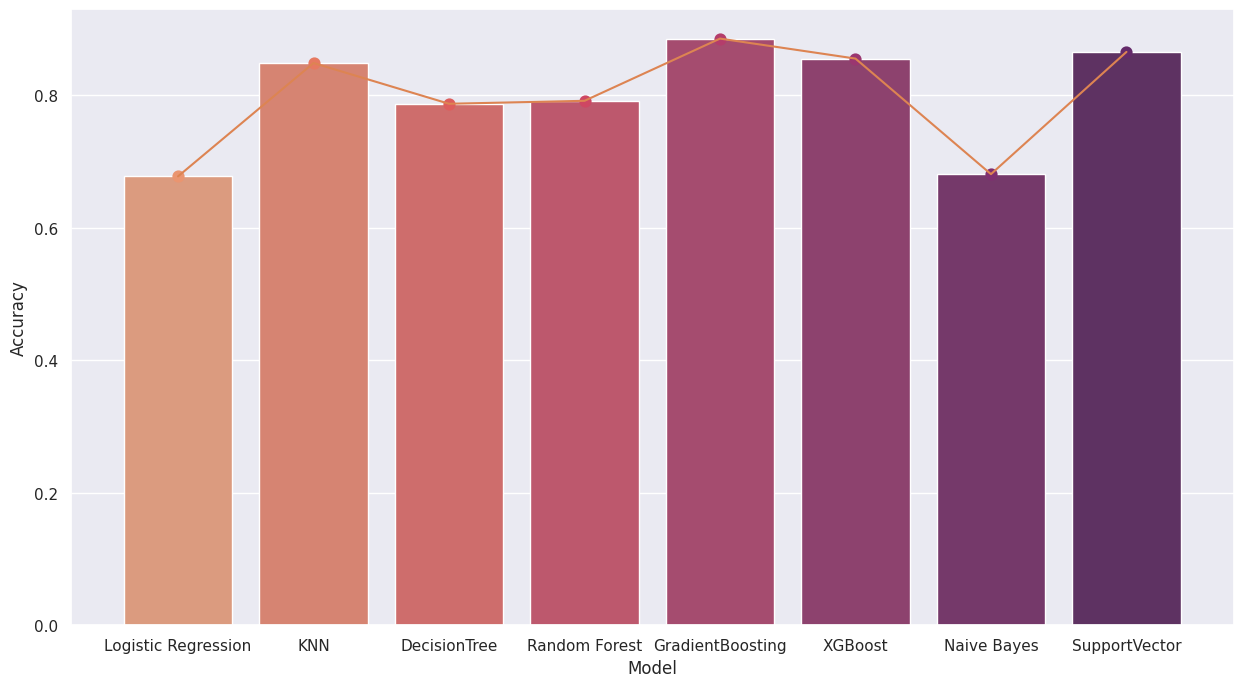

In [259]:
em_list = em_list.reset_index(drop=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.pointplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.barplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.lineplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')

We can see the Highest Accuracy among all the models is of Gradient Boosting followed by Support Vector Classifier.

#Conclusion - Model
1. According to **Decision Tree and Random forest model**, **age** is the most important feature but according to **gradient boost and XG boost model**, most important features are **heart rate and sex respectively**.
2. **Gradient boost model is the most accurate model** among  all the models, on the basis of evaluation parameters such as  **Accuracy (90%), Precision (91%), Specificity (93%), F1 score (89%), and AUC-ROC score (96%)**.
3. **KNN model** is the best model on the basis of **Recall (93%)**.
4. **Logistic Regression model** has the least **Accuracy (70%)**.